In [1466]:
import warnings
warnings.filterwarnings('ignore') 
#import requests # HTTP library
import pandas as pd # for data analysis
import numpy as np  # data in a vectorized manner manipulation
# Matplotlib and associated plotting modules for visualization
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.pyplot as plt

import statsmodels.api as sm # implement statistic models
import time # use time
from geopy.geocoders import Nominatim  # for geocoders referencing
import geopandas as gpd # for spatial dataset
import seaborn as sns # for plotting and visulalization
from scipy import stats # statistic computation
from bs4 import BeautifulSoup # scrapping web site
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import re # regualr expression
import requests
import folium

## 2.2 Data cleaning


### 2.2.1  Data cleaning for house_data dataset

In [1467]:
house_data = pd.read_csv('./dataset/houses.csv')

In [1468]:
# see top 5 rows on the dataset
house_data.head(3)

index                                              title  final_price  \
0      0  1303 - 38 Grenville St, Toronto (C4461599) | Z...       855000   
1      1          2 Cabot Crt, Toronto (W4502992) | Zoocasa       885000   
2      2  1504 - 30 Roehampton Ave, Toronto (C4511330) |...       550000   

   list_price    bedrooms bathrooms             sqft     parking  \
0      870000  2 + 1 beds   2 baths  800–899 sq. ft.   1 parking   
1      898000      3 beds   2 baths      N/A sq. ft.   6 parking   
2      549900      1 beds   1 baths  500–599 sq. ft.  no parking   

                                         description       mls           type  \
0  Luxurious And Spacious Murano Tower. 2+1, 2 Ba...  C4461599      Condo Apt   
1  Fantastic Opportunity To Live Within The Histo...  W4502992  Semi-Detached   
2  Bright Sunfilled Spacious 1 Bdr Unit; Floor To...  C4511330      Condo Apt   

                                           full_link  \
0  https://www.zoocasa.com/toronto-on-real-estate...   
1  https://www.zoocasa.com/toronto-on-real-estate...   
2  https://www.zoocasa.com/toronto-on-real-estate...   

                                    full_address        lat       long  \
0     38 Grenville St, Toronto , Ontario, Canada  43.661896 -79.385748   
1         2 Cabot Crt, Toronto , Ontario, Canada  43.646982 -79.530356   
2   30 Roehampton Ave, Toronto , Ontario, Canada  43.708472 -79.397498   

                city_district  mean_district_income  district_code  
0         Bay Street Corridor                 56526             76  
1  Islington-City Centre West                 52787             14  
2         Mount Pleasant West                 57039            104

In [1469]:

# describes all the columns data types
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15236 entries, 0 to 15235
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 15236 non-null  int64  
 1   title                 15236 non-null  object 
 2   final_price           15236 non-null  int64  
 3   list_price            15236 non-null  int64  
 4   bedrooms              15236 non-null  object 
 5   bathrooms             15236 non-null  object 
 6   sqft                  15236 non-null  object 
 7   parking               15236 non-null  object 
 8   description           15187 non-null  object 
 9   mls                   15236 non-null  object 
 10  type                  15236 non-null  object 
 11  full_link             15236 non-null  object 
 12  full_address          15236 non-null  object 
 13  lat                   15236 non-null  float64
 14  long                  15236 non-null  float64
 15  city_district      

In [1470]:
# print the set of the dataset
house_data.shape

(15236, 18)

In [1471]:
# filter column sqft with value N/A sq. ft.
sqft_na_value = house_data[house_data.sqft == 'N/A sq. ft.']
sqft_na_value.shape
print('percent of missing data column sqft (% {})'.format(round((sqft_na_value.shape[0]/house_data.shape[0])*100,2)))

percent of missing data column sqft (% 29.68)


In [1472]:
# sqft (% 29.68)  > 10 
house_data = house_data[house_data.sqft != 'N/A sq. ft.']
house_data.shape

(10714, 18)

In [1473]:
# convert bedrooms string to numerical data
def conver_string_num(x):
    x = str(x)
    x = x.replace(' ','')
    result = 0
    tampon = x.split('+')
    if len(tampon) == 1:
        val = re.sub('\D','',tampon[0])
        if val !='':
            result = np.float(re.sub('\D','',tampon[0]))
    elif len(tampon) >1:
        digit_1 = float(tampon[0])
        digit_2 = np.float(re.sub('\D','',tampon[1]))
        result = digit_1+digit_2
    return result 
    

In [1474]:
conver_string_num(['1 dsd'])

1.0

In [1475]:
# change columns sqft text to categorical value 
my_dict = {'0-499 sq. ft.': 0,
               '1000–1199 sq. ft.':10,
               '1100–1299 sq. ft.':11,
               '1100–1500 sq. ft.':12,
               '1200–1399 sq. ft.':13,
               '1400–1599 sq. ft.':14,
               '1500–2000 sq. ft.':15,
               '1600–1799 sq. ft.':16,
               '1800–1999 sq. ft.':17,
               '2000–2249 sq. ft.':18,
               '2000–2500 sq. ft.':19,
               '2250–2499 sq. ft.':20,
               '2500–2749 sq. ft.':21,
               '2500–3000 sq. ft.':22,
               '2750–2999 sq. ft.':23,
               '3000–3249 sq. ft.':24,
               '3000–3500 sq. ft.':25,
               '3250–3499 sq. ft.':26,
               '3500–5000 sq. ft.':27,
               '4250–4499 sq. ft.':28,
               '500–599 sq. ft.': 1,
               '500–699 sq. ft.':2,
               '600–699 sq. ft.':3,
               '700–1100 sq. ft.':4,
               '700–799 sq. ft.':5,
               '700–899 sq. ft.':6,
               '800–899 sq. ft.':7,
               '900–1099 sq. ft.':8,
               '900–999 sq. ft.':9}
house_data['sqft_cat'] = house_data['sqft']
house_data.replace({'sqft_cat':my_dict},inplace =True)
house_data.head(5)

index                                              title  final_price  \
0      0  1303 - 38 Grenville St, Toronto (C4461599) | Z...       855000   
2      2  1504 - 30 Roehampton Ave, Toronto (C4511330) |...       550000   
3      3  514 - 65 East Liberty St, Toronto (C4515763) |...       665000   
5      5  505 - 4 Elsinore Path, Toronto (W4517121) | Zo...       368000   
6      6     110 Albertus Ave, Toronto (C4467843) | Zoocasa      2700000   

   list_price    bedrooms bathrooms               sqft     parking  \
0      870000  2 + 1 beds   2 baths    800–899 sq. ft.   1 parking   
2      549900      1 beds   1 baths    500–599 sq. ft.  no parking   
3      600000  1 + 1 beds   1 baths    600–699 sq. ft.   1 parking   
5      289000      0 beds   1 baths      0-499 sq. ft.   1 parking   
6     2798000      4 beds   5 baths  2500–3000 sq. ft.   2 parking   

                                         description       mls       type  \
0  Luxurious And Spacious Murano Tower. 2+1, 2 Ba...  C4461599  Condo Apt   
2  Bright Sunfilled Spacious 1 Bdr Unit; Floor To...  C4511330  Condo Apt   
3  Rare Loft-Like Condo In Liberty Village W/ 18'...  C4515763  Condo Apt   
5  Suite 505 Is An Immaculate Condo With The Most...  W4517121  Condo Apt   
6  Gorgeous Luxury Custom Built, 4 Bdrm Home On A...  C4467843   Detached   

                                           full_link  \
0  https://www.zoocasa.com/toronto-on-real-estate...   
2  https://www.zoocasa.com/toronto-on-real-estate...   
3  https://www.zoocasa.com/toronto-on-real-estate...   
5  https://www.zoocasa.com/toronto-on-real-estate...   
6  https://www.zoocasa.com/toronto-on-real-estate...   

                                     full_address        lat       long  \
0      38 Grenville St, Toronto , Ontario, Canada  43.661896 -79.385748   
2    30 Roehampton Ave, Toronto , Ontario, Canada  43.708472 -79.397498   
3   65 East Liberty St, Toronto , Ontario, Canada  43.638399 -79.414448   
5      4 Elsinore Path, Toronto , Ontario, Canada  43.601518 -79.510062   
6     110 Albertus Ave, Toronto , Ontario, Canada  43.714068 -79.403338   

         city_district  mean_district_income  district_code  sqft_cat  
0  Bay Street Corridor                 56526             76         7  
2  Mount Pleasant West                 57039            104         1  
3              Niagara                 70623             82         3  
5          New Toronto                 44101             18         0  
6  Lawrence Park South                169203            103        22

In [1476]:
# extracts numerical infos from [bedrooms,bathrooms,parking]
house_data['bedrooms_num'] = house_data['bedrooms'].apply(lambda x:conver_string_num(x))
house_data['bathrooms_num'] = house_data['bathrooms'].apply(lambda x:conver_string_num(x))
house_data['parking_num'] = house_data['parking'].apply(lambda x:conver_string_num(x))

In [1477]:
# converts final_price  and mean_district_income to 10k dollars
house_data['final_price_10k'] = house_data['final_price']/10000.0
house_data['mean_district_income_10k'] = np.round(house_data['mean_district_income']/10000.0,2)
house_data['final_price_log'] = np.round(np.log(house_data['final_price']),2)


In [1478]:
## remove (-) in city_district columns
house_data.city_district =house_data.city_district.str.replace('-',' ')


In [1479]:
# select feautres to improve data analysis 
selected_features =['lat','long','type','city_district','district_code','sqft','sqft_cat','parking','bedrooms_num','bathrooms_num','parking_num','final_price_10k','final_price_log','mean_district_income_10k']
house_final_data =house_data[selected_features]
house_final_data.head(3)

lat       long       type        city_district  district_code  \
0  43.661896 -79.385748  Condo Apt  Bay Street Corridor             76   
2  43.708472 -79.397498  Condo Apt  Mount Pleasant West            104   
3  43.638399 -79.414448  Condo Apt              Niagara             82   

              sqft  sqft_cat     parking  bedrooms_num  bathrooms_num  \
0  800–899 sq. ft.         7   1 parking           3.0            2.0   
2  500–599 sq. ft.         1  no parking           1.0            1.0   
3  600–699 sq. ft.         3   1 parking           2.0            1.0   

   parking_num  final_price_10k  final_price_log  mean_district_income_10k  
0          1.0             85.5            13.66                      5.65  
2          0.0             55.0            13.22                      5.70  
3          1.0             66.5            13.41                      7.06

### 2.2.2 mci_2014_2018 Data cleaning

In [1480]:
mci_2014_2018 = pd.read_csv('./dataset/mci_2014_to_2018.csv')
print(mci_2014_2018.shape)
mci_2014_2018['Neighbourhood'] = mci_2014_2018.Neighbourhood.apply(lambda x: x.split('(')[0].replace('-',' '))
mci_2014_2018.head()

(167525, 29)


X          Y  Index_ event_unique_id            occurrencedate  \
0 -79.385193  43.659229    2349  GO-20149004286  2014-06-20T10:55:00.000Z   
1 -79.425400  43.777592    2350  GO-20142411379  2014-07-02T00:20:00.000Z   
2 -79.425400  43.777592    2351  GO-20142411379  2014-07-02T00:20:00.000Z   
3 -79.210373  43.801727    2352  GO-20142412127  2014-07-02T01:30:00.000Z   
4 -79.254334  43.835884    2354  GO-20142417548  2014-07-02T20:52:00.000Z   

               reporteddate premisetype  ucr_code  ucr_ext  \
0  2014-06-20T13:20:00.000Z   Apartment      2130      210   
1  2014-07-02T02:58:00.000Z     Outside      1457      100   
2  2014-07-02T02:58:00.000Z     Outside      1610      100   
3  2014-07-02T05:40:00.000Z       House      2120      200   
4  2014-07-02T20:57:00.000Z  Commercial      1430      100   

               offence  reportedyear reportedmonth  reportedday  \
0           Theft Over          2014          June           20   
1   Pointing A Firearm          2014          July            2   
2  Robbery With Weapon          2014          July            2   
3                  B&E          2014          July            2   
4              Assault          2014          July            2   

   reporteddayofyear reporteddayofweek  reportedhour  occurrenceyear  \
0                171        Friday                13          2014.0   
1                183        Wednesday              2          2014.0   
2                183        Wednesday              2          2014.0   
3                183        Wednesday              5          2014.0   
4                183        Wednesday             20          2014.0   

  occurrencemonth  occurrenceday  occurrencedayofyear occurrencedayofweek  \
0            June           20.0                171.0          Friday       
1            July            2.0                183.0          Wednesday    
2            July            2.0                183.0          Wednesday    
3            July            2.0                183.0          Wednesday    
4            July            2.0                183.0          Wednesday    

   occurrencehour              MCI Division  Hood_ID         Neighbourhood  \
0              10       Theft Over      D52       76  Bay Street Corridor    
1               0          Assault      D32       36     Newtonbrook West    
2               0          Robbery      D32       36     Newtonbrook West    
3               1  Break and Enter      D42      132              Malvern    
4              20          Assault      D42      130             Milliken    

         Lat       Long  ObjectId  
0  43.659229 -79.385193      2001  
1  43.777592 -79.425400      2002  
2  43.777592 -79.425400      2003  
3  43.801727 -79.210373      2004  
4  43.835884 -79.254334      2005

In [1481]:
# improve  ['MCI','occurrencedayofweek','occurrencehour']
mci_2014_2018 = get_dummies(mci_2014_2018,columns = ['MCI','occurrencedayofweek','occurrencehour'])
val = {'January': 1,'February': 2,'March': 3,'April':4,'May':5,'June': 6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
mci_2014_2018.replace({"occurrencemonth": val},inplace=True)
# drop duplicate 
mci_2014_2018.drop_duplicates(keep=False,inplace=True) 
mci_2014_2018.head(10)



(167525, 65)


X          Y  Index_ event_unique_id            occurrencedate  \
0 -79.385193  43.659229    2349  GO-20149004286  2014-06-20T10:55:00.000Z   
1 -79.425400  43.777592    2350  GO-20142411379  2014-07-02T00:20:00.000Z   
2 -79.425400  43.777592    2351  GO-20142411379  2014-07-02T00:20:00.000Z   
3 -79.210373  43.801727    2352  GO-20142412127  2014-07-02T01:30:00.000Z   
4 -79.254334  43.835884    2354  GO-20142417548  2014-07-02T20:52:00.000Z   
5 -79.273819  43.709972    2355  GO-20142524077  2014-07-18T00:01:00.000Z   
6 -79.466019  43.709179    2356  GO-20142526048  2014-07-18T23:15:00.000Z   
7 -79.386063  43.655243    2357  GO-20142528713  2014-07-19T01:30:00.000Z   
8 -79.237824  43.791515    2358  GO-20142531700  2014-07-19T15:00:00.000Z   
9 -79.435112  43.717243    2359  GO-20142536209  2014-07-20T01:30:00.000Z   

               reporteddate premisetype  ucr_code  ucr_ext  \
0  2014-06-20T13:20:00.000Z   Apartment      2130      210   
1  2014-07-02T02:58:00.000Z     Outside      1457      100   
2  2014-07-02T02:58:00.000Z     Outside      1610      100   
3  2014-07-02T05:40:00.000Z       House      2120      200   
4  2014-07-02T20:57:00.000Z  Commercial      1430      100   
5  2014-07-18T17:36:00.000Z       House      2120      200   
6  2014-07-18T23:15:00.000Z       House      1430      100   
7  2014-07-19T11:58:00.000Z     Outside      1610      100   
8  2014-07-19T22:11:00.000Z       House      2120      220   
9  2014-07-20T16:33:00.000Z       Other      2120      220   

               offence  reportedyear reportedmonth  reportedday  \
0           Theft Over          2014          June           20   
1   Pointing A Firearm          2014          July            2   
2  Robbery With Weapon          2014          July            2   
3                  B&E          2014          July            2   
4              Assault          2014          July            2   
5                  B&E          2014          July           18   
6              Assault          2014          July           18   
7  Robbery With Weapon          2014          July           19   
8         B&E W'Intent          2014          July           19   
9         B&E W'Intent          2014          July           20   

   reporteddayofyear reporteddayofweek  reportedhour  occurrenceyear  \
0                171        Friday                13          2014.0   
1                183        Wednesday              2          2014.0   
2                183        Wednesday              2          2014.0   
3                183        Wednesday              5          2014.0   
4                183        Wednesday             20          2014.0   
5                199        Friday                17          2014.0   
6                199        Friday                23          2014.0   
7                200        Saturday              11          2014.0   
8                200        Saturday              22          2014.0   
9                201        Sunday                16          2014.0   

   occurrencemonth  occurrenceday  occurrencedayofyear occurrencedayofweek  \
0              6.0           20.0                171.0          Friday       
1              7.0            2.0                183.0          Wednesday    
2              7.0            2.0                183.0          Wednesday    
3              7.0            2.0                183.0          Wednesday    
4              7.0            2.0                183.0          Wednesday    
5              7.0           18.0                199.0          Friday       
6              7.0           18.0                199.0          Friday       
7              7.0           19.0                200.0          Saturday     
8              7.0           19.0                200.0          Saturday     
9              7.0           20.0                201.0          Sunday       

   occurrencehour              MCI Division  Hood_ID         Neighbourhood  \
0           


# 3. Exploratory Data Analysis

## 3.1 Exploratory Data Analysis  for house_final_data dataset

In [1482]:
house_final_data.describe()

lat          long  district_code      sqft_cat  bedrooms_num  \
count  10714.000000  10714.000000   10714.000000  10714.000000  10714.000000   
mean      43.698620    -79.399140      69.324902      8.652604      2.431118   
std        0.058192      0.088568      37.030941      6.272604      1.236282   
min       43.589023    -79.621693       1.000000      0.000000      0.000000   
25%       43.646203    -79.450078      40.000000      3.000000      2.000000   
50%       43.681400    -79.396620      76.000000      7.000000      2.000000   
75%       43.757173    -79.357931      93.000000     13.000000      3.000000   
max       43.837724    -79.124094     140.000000     28.000000     12.000000   

       bathrooms_num   parking_num  final_price_10k  final_price_log  \
count   10714.000000  10714.000000     10714.000000     10714.000000   
mean        1.885664      1.307635        76.181966        13.405861   
std         1.020692      5.823103        51.903968         0.480136   
min         1.000000      0.000000        10.300000        11.540000   
25%         1.000000      1.000000        48.500000        13.090000   
50%         2.000000      1.000000        61.000000        13.320000   
75%         2.000000      1.000000        82.500000        13.620000   
max        14.000000    367.000000       755.000000        15.840000   

       mean_district_income_10k  
count              10714.000000  
mean                   5.672027  
std                    3.152057  
min                    2.600000  
25%                    3.630000  
50%                    5.280000  
75%                    7.060000  
max                   30.800000

In [1483]:
# improve categorical values to numerics values function
def get_dummies(dataset,columns):
    for column_ in columns:
        data = pd.get_dummies(dataset[column_])
        for column in data.columns:
            dataset[column] = data[column]
    print(dataset.shape)
    return dataset

In [1484]:
# function to compute group size of columns in dataset
def groupby_size(dataset,columns,name_of_size,ascending = False):
    data_group = dataset.groupby(columns).size().to_frame()
    data_group.reset_index(inplace = True)
    data_group.rename(columns ={0:name_of_size},inplace= True)
    sorted_values = data_group.sort_values(by =[name_of_size],ascending = False)
    return sorted_values    


In [1485]:
# function to compute group mean values of columns in dataset
def groupby_mean_value(dataset,columns,column_value,name_of_size,ascending = False):
    data_group = dataset.groupby(columns).final_price_10k.mean().to_frame()
    data_group.reset_index(inplace = True)
    data_group.rename(columns ={column_value:name_of_size},inplace= True)
    sorted_values = data_group.sort_values(by =[name_of_size],ascending = False)

### 3.1.1 Choropleth of total houses by districts

In [1486]:
house_by_neighborhood1 = groupby_size(dataset = house_data,columns =['district_code','city_district'],name_of_size = 'Total houses')

In [1487]:
# 1. retreives geodata from Neighbourhoods.shp shapefile
data_geom = gpd.read_file('./dataset/Neighbourhoods.shp')
# 2. selects columns need to perform operations
data_geom= data_geom[['FIELD_5','FIELD_11','FIELD_12','geometry']]
# 3. renames columns 'FIELD_11' to 'x','FIELD_12' to 'y','FIELD_5' to 'district_code'
data_geom.rename(columns ={'FIELD_11':'x','FIELD_12': 'y','FIELD_5':'district_code'},inplace =True)
# merge house_final_data to data_geom
data_geom = pd.merge(data_geom,house_by_neighborhood1, how ='inner',on ='district_code')

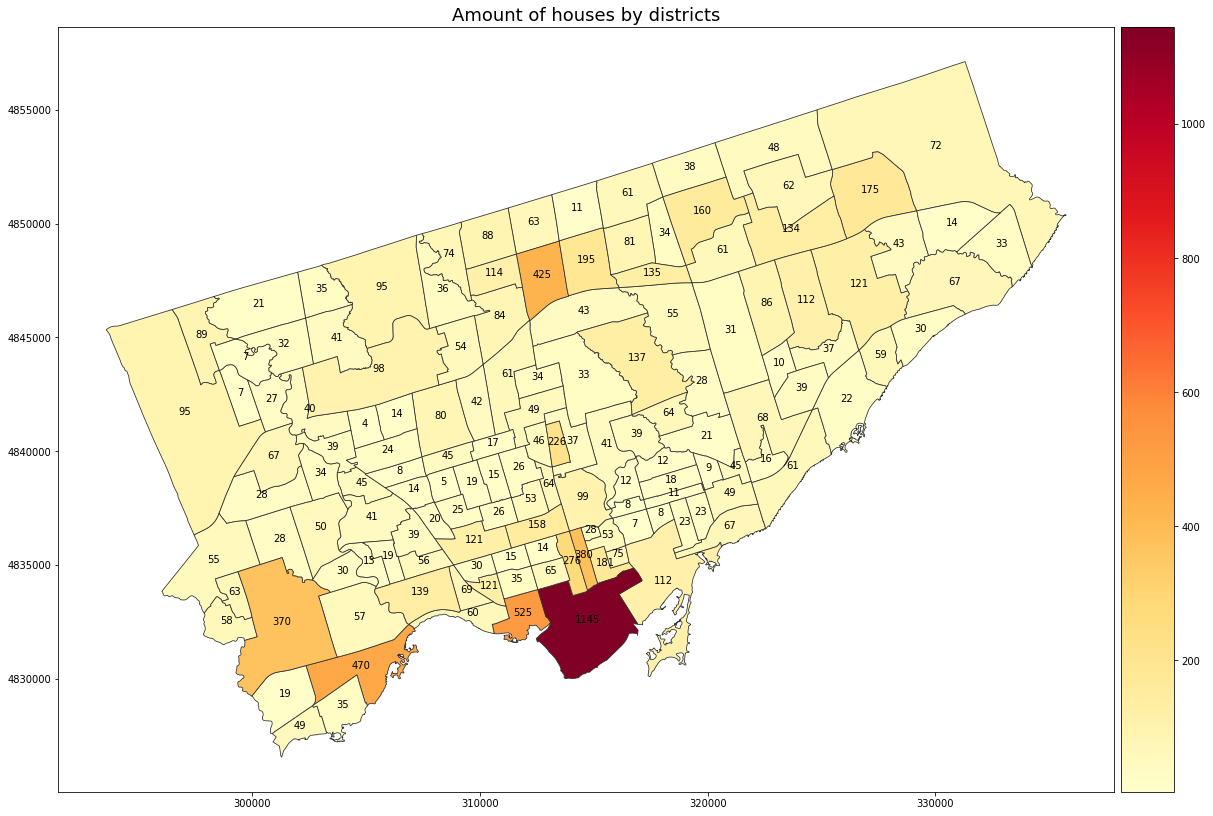

In [1488]:
 # import labrairie to make locatable axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
# draws choropleth map
fig, ax = plt.subplots(1, 1,figsize =(20,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
data_geom.rename(columns ={'district_code': 'HOODNUM'},inplace =True)
ax =data_geom.plot(column='Total houses', cmap='YlOrRd', linewidth=0.8, edgecolor='0.2',legend=True, ax=ax,cax = cax)
ax.set_title('Amount of houses by districts',fontsize =18)
data_geom.apply(lambda x: ax.annotate(s=x['Total houses'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1);


### 3.1.2 Choropleth of average  house price  by districts

In [1489]:
neighbourdhood2 = np.round(house_data.groupby(['district_code','city_district']).final_price_10k.mean(),2).to_frame()
neighbourdhood2.reset_index(inplace = True)
neighbourdhood2.rename(columns ={'final_price_10k': 'Mean house price'},inplace =True)


In [1490]:
# 1. retreives geodata from Neighbourhoods.shp shapefile
data_geom = gpd.read_file('./dataset/Neighbourhoods.shp')
# 2. selects columns need to perform operations
data_geom= data_geom[['FIELD_5','FIELD_11','FIELD_12','geometry']]
data_geom.rename(columns ={'FIELD_11':'x','FIELD_12': 'y','FIELD_5':'district_code'},inplace =True)
data_geom = pd.merge(data_geom,neighbourdhood2, how ='inner',on ='district_code')
# 3. renames columns 'FIELD_11' to 'x','FIELD_12' to 'y','FIELD_5' to 'district_code'
data_geom['Mean house price'] = np.round(data_geom['Mean house price'],0)
# merge house_final_data to data_geom
#data_geom.head()

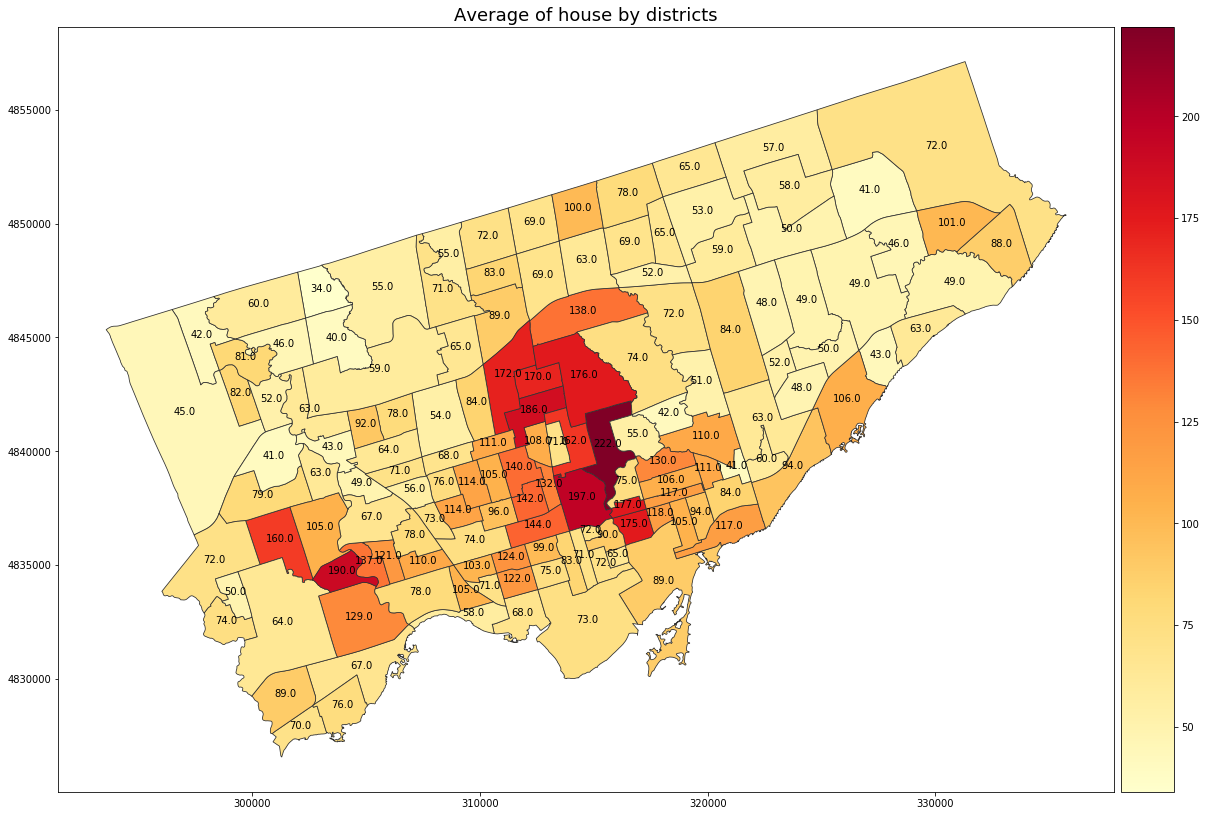

In [1491]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1,figsize =(20,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
data_geom.rename(columns ={'district_code': 'HOODNUM'},inplace =True)
ax =data_geom.plot(column='Mean house price', cmap='YlOrRd', linewidth=0.8, edgecolor='0.2',legend=True, ax=ax,cax = cax)
ax.set_title('Average of house price by district',fontsize =18)
data_geom.apply(lambda x: ax.annotate(s=x['Mean house price'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1);


### 3.1.3 Houses price distribution by district

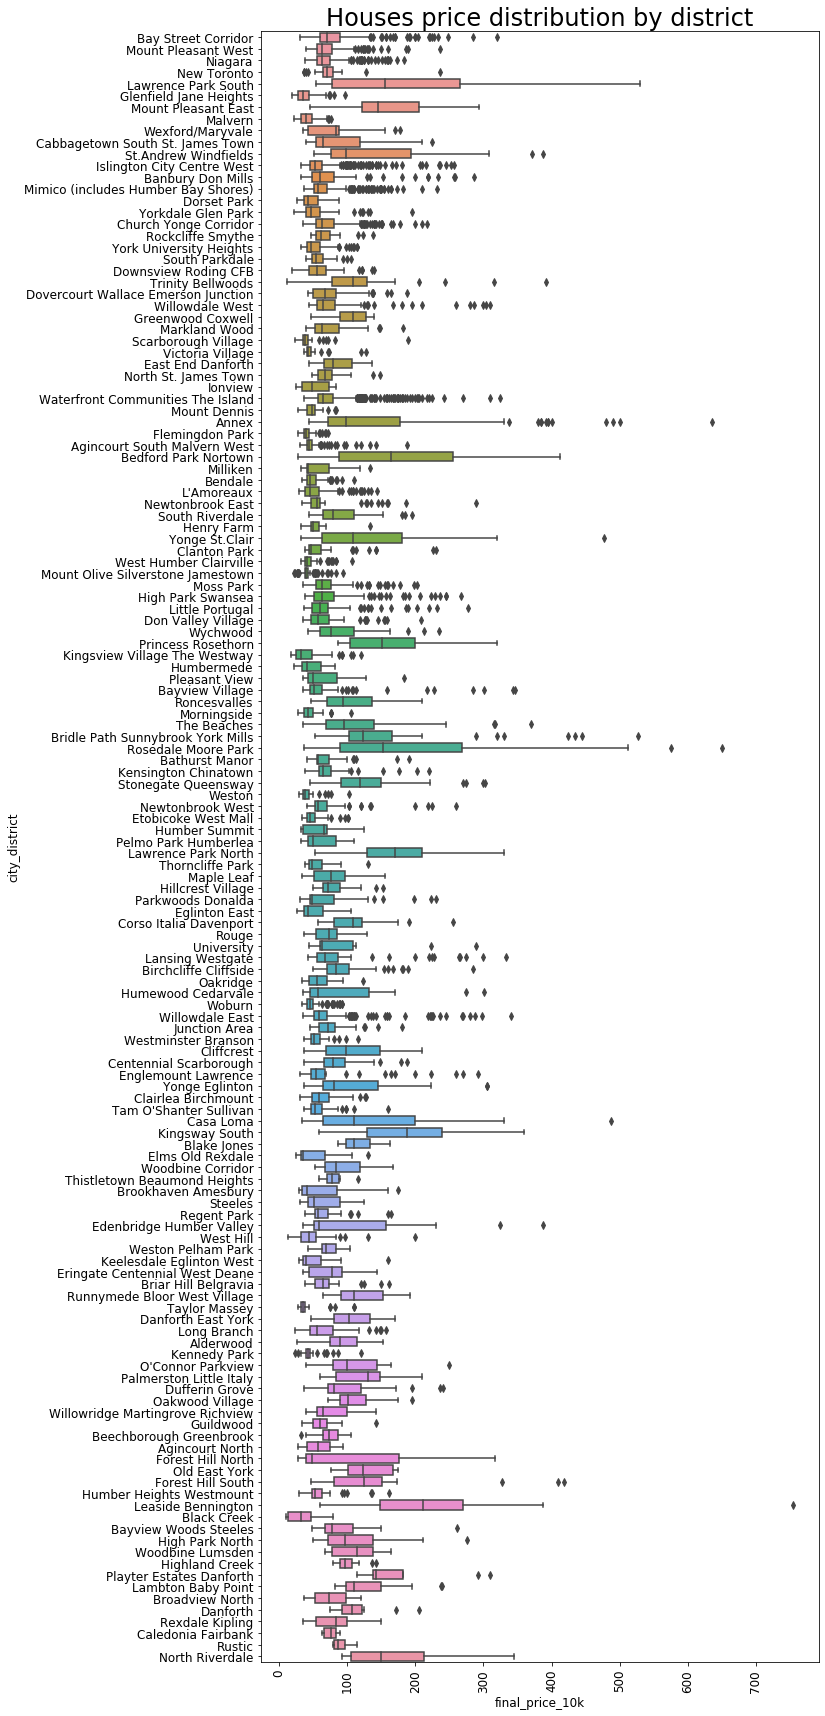

In [1492]:
fig, ax = plt.subplots(1, 1, figsize=(10, 30))
data_filtered = house_final_data
plt.ylabel('District',fontsize =12)
plt.yticks(fontsize =12)
plt.xticks(fontsize =12)
plt.xlabel('Houses price', fontsize=12)
plt.title('Houses price distribution by district',fontsize=24)
sns.boxplot(data =data_filtered,y ='city_district',x='final_price_10k',ax =ax)
for label in ax.get_xticklabels():
        label.set_rotation(90)


### 3.1.3 Houses price distribution by Type


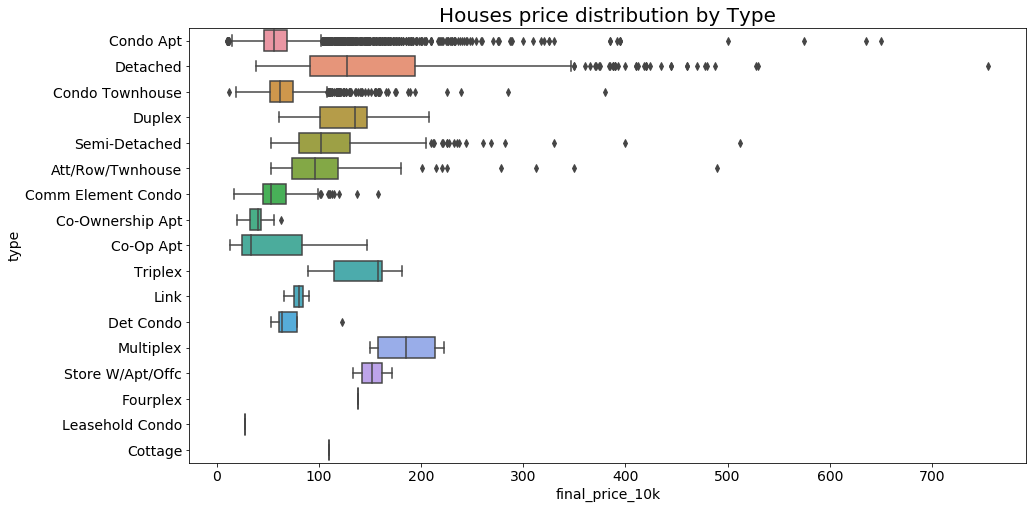

In [1493]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
house_final_data.parking_num = house_final_data.parking_num.astype('int')
plt.ylabel('District',fontsize =14)
plt.yticks(fontsize =14)
plt.xticks(fontsize =14)
plt.xlabel('Houses price', fontsize=14)
plt.title('Houses price distribution by Type',fontsize=20)
sns.boxplot(data =data_filtered,x ='final_price_10k',y='type',ax =ax)

### 3.1.4 Houses price distribution by Type

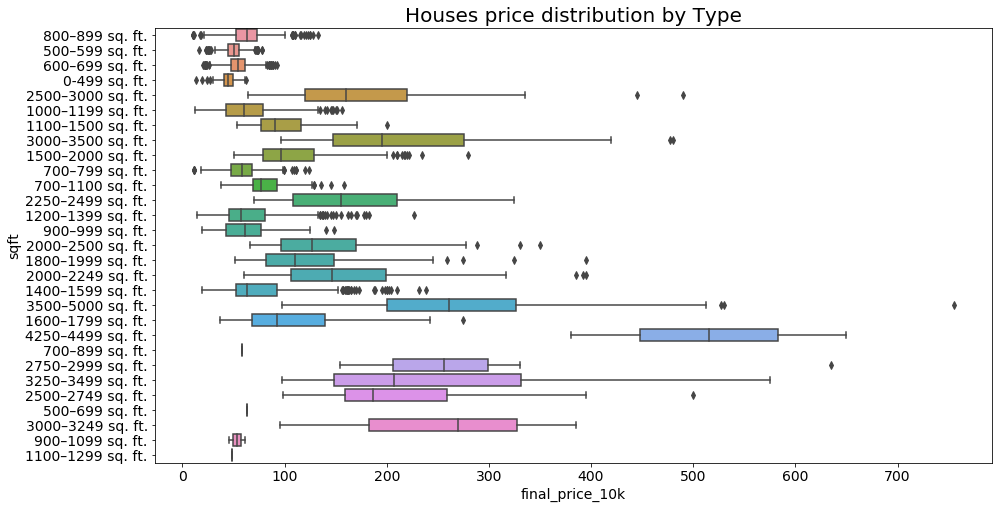

In [1494]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
data_filtered = house_final_data
plt.ylabel('District',fontsize =14)
plt.yticks(fontsize =14)
plt.xticks(fontsize =14)
plt.xlabel('Houses price', fontsize=14)
plt.title('Houses price distribution by Type',fontsize=20)
sns.boxplot(data =data_filtered,x ='final_price_10k',y='sqft',ax =ax)

### 3.1.5 Improve statistic test

In [1495]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(house_final_data['final_price_10k'], house_data['type'])
mc_results = mc.tukeyhsd()
print(mc_results)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
      group1             group2        meandiff p-adj    lower    upper   reject
--------------------------------------------------------------------------------
  Att/Row/Twnhouse          Co-Op Apt   -51.959  0.001  -83.2215 -20.6965   True
  Att/Row/Twnhouse   Co-Ownership Apt  -65.8776  0.001  -95.5314 -36.2239   True
  Att/Row/Twnhouse Comm Element Condo  -46.5002  0.001  -61.0707 -31.9297   True
  Att/Row/Twnhouse          Condo Apt  -41.9036  0.001  -51.8105 -31.9966   True
  Att/Row/Twnhouse    Condo Townhouse  -37.0945  0.001  -47.8315 -26.3575   True
  Att/Row/Twnhouse            Cottage    5.5779    0.9 -140.2411  151.397  False
  Att/Row/Twnhouse          Det Condo  -28.6846    0.9 -102.0829  44.7137  False
  Att/Row/Twnhouse           Detached   50.1303  0.001   39.5122  60.7484   True
  Att/Row/Twnhouse             Duplex   27.7816 0.4663   -9.8792  65.4425  False
  Att/Row/Twnhouse          

In [1496]:
mc = MultiComparison(house_data['final_price_10k'], house_data['sqft'])
mc_results = mc.tukeyhsd()
print(mc_results)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1            group2       meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------------------
    0-499 sq. ft. 1000–1199 sq. ft.   18.2676  0.001   11.4787   25.0565   True
    0-499 sq. ft. 1100–1299 sq. ft.    3.5202    0.9 -114.2473  121.2876  False
    0-499 sq. ft. 1100–1500 sq. ft.   51.7921  0.001    43.521   60.0633   True
    0-499 sq. ft. 1200–1399 sq. ft.   21.1617  0.001   14.0384    28.285   True
    0-499 sq. ft. 1400–1599 sq. ft.   31.9582  0.001   23.7479   40.1686   True
    0-499 sq. ft. 1500–2000 sq. ft.   61.3111  0.001   53.4132    69.209   True
    0-499 sq. ft. 1600–1799 sq. ft.   59.8321  0.001   49.6273    70.037   True
    0-499 sq. ft. 1800–1999 sq. ft.   78.3581  0.001    64.901   91.8152   True
    0-499 sq. ft. 2000–2249 sq. ft.  118.4641  0.001  103.6023  133.3259   True
    0-499 sq. ft. 2000–2500 sq. ft.   94

### 3.1.6 Improve insight in numeric values

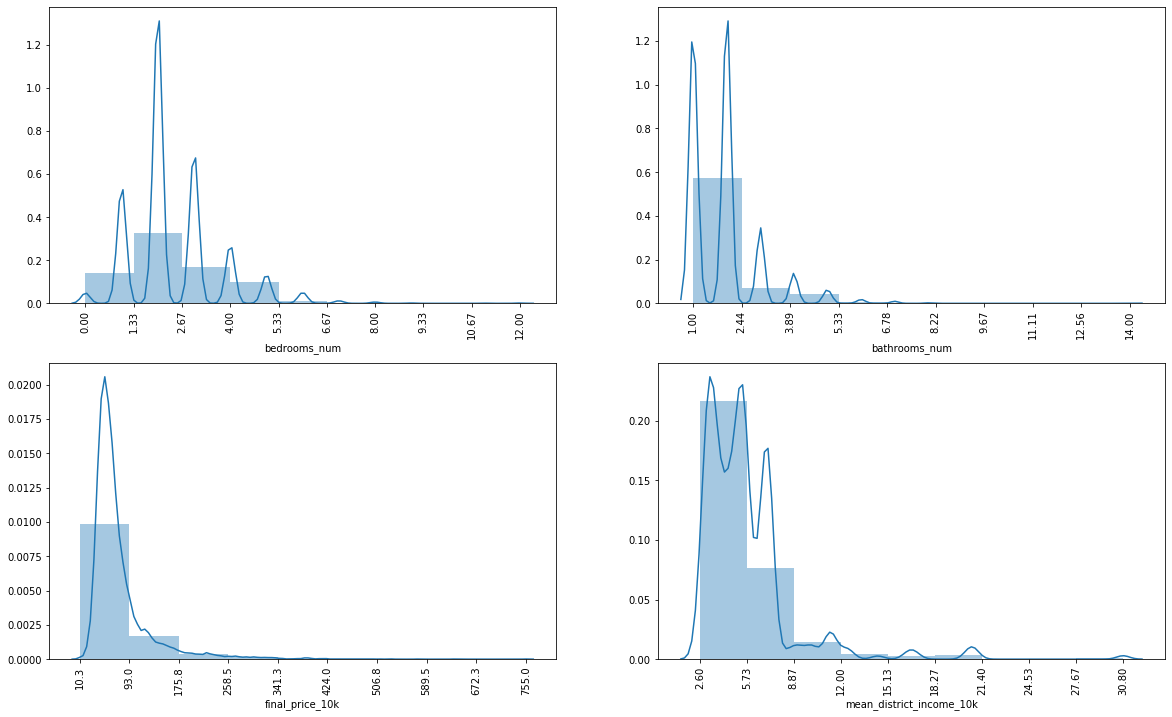

In [1497]:
numerical = ['bedrooms_num','bathrooms_num','final_price_10k','mean_district_income_10k']
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
for variable, subplot in zip(numerical, ax.flatten()):
    new_bins = np.linspace(house_final_data[variable].min(),house_data[variable].max(),10)
    subplot.set_xticks(new_bins)
    sns.distplot(house_final_data[variable], ax=subplot,bins=new_bins,kde=True)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

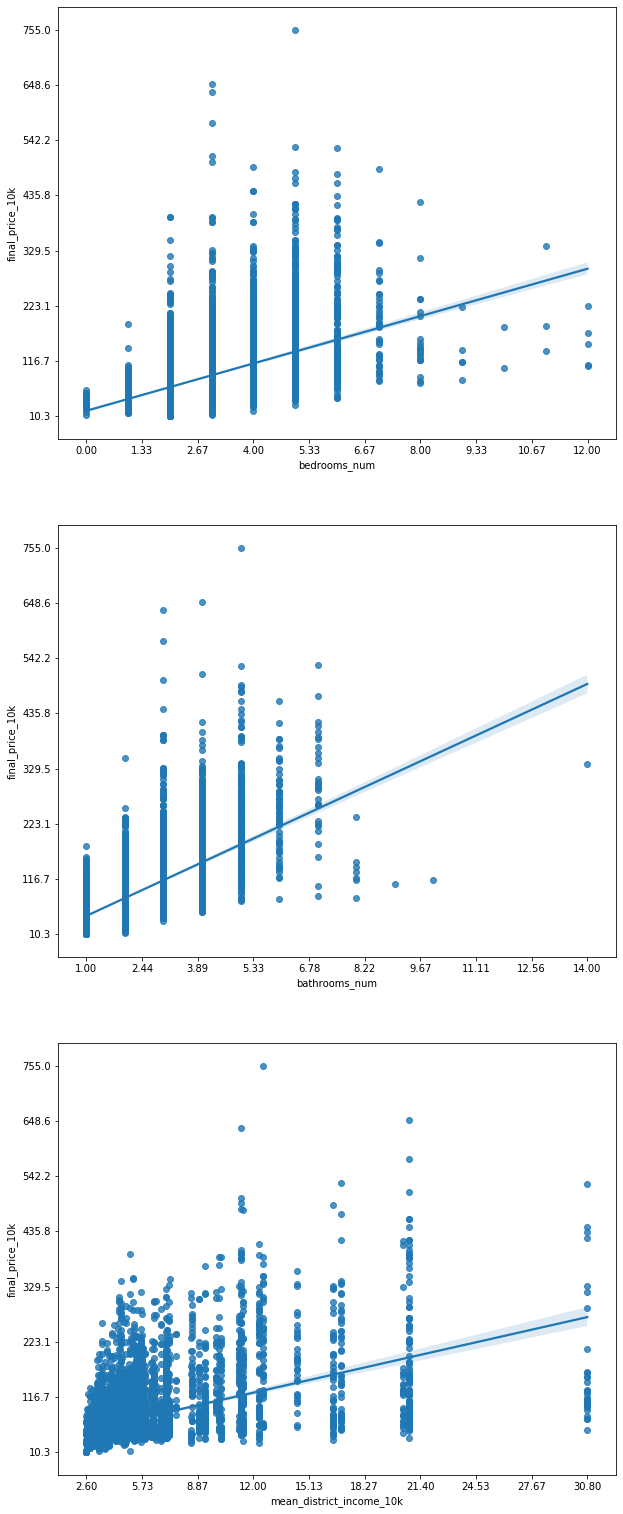

In [1498]:
numerical = ['bedrooms_num','bathrooms_num','mean_district_income_10k']
fig, ax = plt.subplots(3,1,figsize=(10, 27))
for variable, subplot in zip(numerical, ax.flatten()):
    new_xbins = np.linspace(house_final_data[variable].min(),house_data[variable].max(),10)
    new_ybins = np.linspace(house_final_data['final_price_10k'].min(),house_data['final_price_10k'].max(),8)
    subplot.set_xticks(new_xbins)
    subplot.set_yticks(new_ybins)
    sns.regplot(x =variable,y='final_price_10k',data =house_final_data,ax=subplot)
    subplot.set(xlabel=variable,ylabel="final_price_10k")

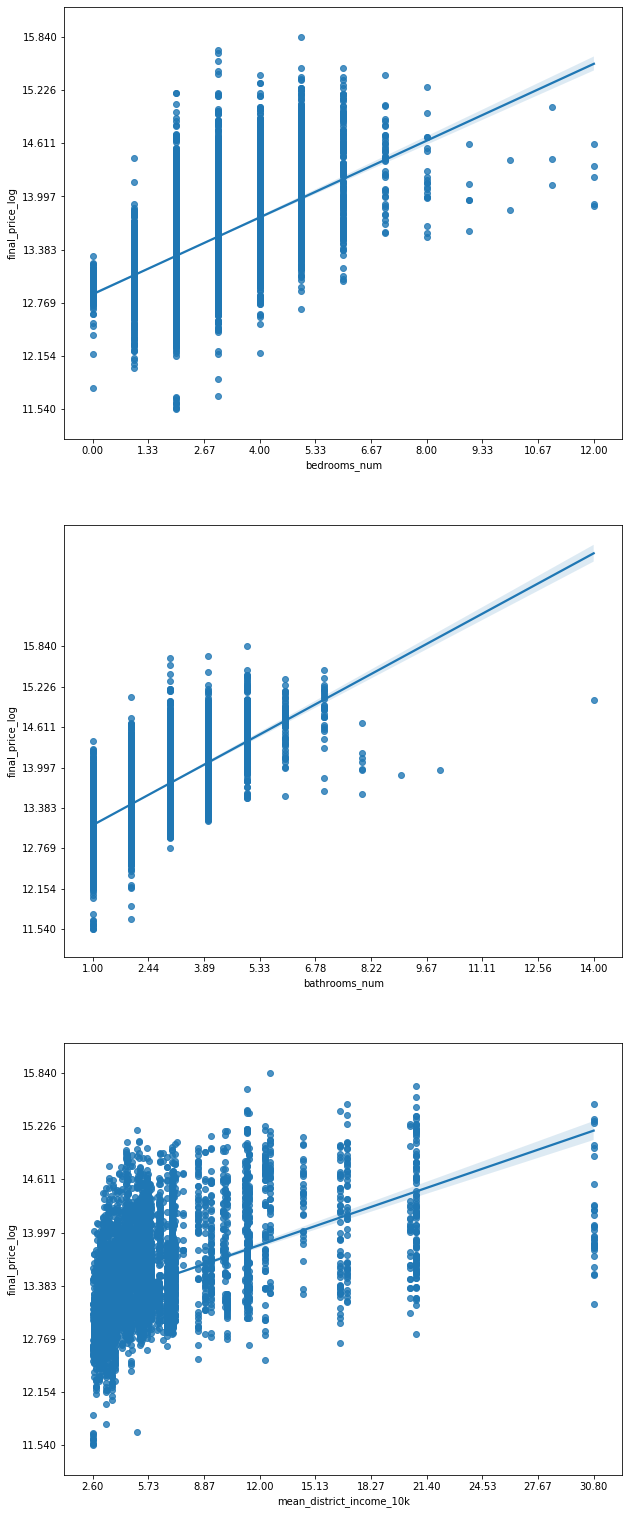

In [1499]:
numerical = ['bedrooms_num','bathrooms_num','mean_district_income_10k']
fig, ax = plt.subplots(3,1,figsize=(10, 27))
for variable, subplot in zip(numerical, ax.flatten()):
    new_xbins = np.linspace(house_final_data[variable].min(),house_data[variable].max(),10)
    new_ybins = np.linspace(house_final_data['final_price_log'].min(),house_data['final_price_log'].max(),8)
    subplot.set_xticks(new_xbins)
    subplot.set_yticks(new_ybins)
    sns.regplot(x =variable,y='final_price_log',data =house_final_data,ax=subplot)
    subplot.set(xlabel=variable,ylabel="final_price_log")

In [1500]:
# improve categorical values to numerics values function
def get_dummies(dataset,columns):
    for column_ in columns:
        data = pd.get_dummies(dataset[column_])
        for column in data.columns:
            dataset[column] = data[column]
    print(dataset.shape)
    return dataset

In [1501]:
house_final_data1 = get_dummies(house_final_data,columns=['district_code','type','sqft','parking'])

(10714, 225)


In [1502]:
house_final_data1.head()

lat       long       type        city_district  district_code  \
0  43.661896 -79.385748  Condo Apt  Bay Street Corridor             76   
2  43.708472 -79.397498  Condo Apt  Mount Pleasant West            104   
3  43.638399 -79.414448  Condo Apt              Niagara             82   
5  43.601518 -79.510062  Condo Apt          New Toronto             18   
6  43.714068 -79.403338   Detached  Lawrence Park South            103   

                sqft  sqft_cat     parking  bedrooms_num  bathrooms_num  \
0    800–899 sq. ft.         7   1 parking           3.0            2.0   
2    500–599 sq. ft.         1  no parking           1.0            1.0   
3    600–699 sq. ft.         3   1 parking           2.0            1.0   
5      0-499 sq. ft.         0   1 parking           0.0            1.0   
6  2500–3000 sq. ft.        22   2 parking           4.0            5.0   

   parking_num  final_price_10k  final_price_log  mean_district_income_10k  1  \
0            1             85.5            13.66                      5.65  0   
2            0             55.0            13.22                      5.70  0   
3            1             66.5            13.41                      7.06  0   
5            1             36.8            12.82                      4.41  0   
6            2            270.0            14.81                     16.92  0   

   2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  \
0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   0   0   
6  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   99  100  101  102  103  104  105  106  107  108  109  110  111  112  113  \
0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2   0    0    0    0    0    1   

## 3.2 Exploratory Data Analysis  for mci_2014_2018 dataset

In [1503]:
mci_2014_2018.head()

X          Y  Index_ event_unique_id            occurrencedate  \
0 -79.385193  43.659229    2349  GO-20149004286  2014-06-20T10:55:00.000Z   
1 -79.425400  43.777592    2350  GO-20142411379  2014-07-02T00:20:00.000Z   
2 -79.425400  43.777592    2351  GO-20142411379  2014-07-02T00:20:00.000Z   
3 -79.210373  43.801727    2352  GO-20142412127  2014-07-02T01:30:00.000Z   
4 -79.254334  43.835884    2354  GO-20142417548  2014-07-02T20:52:00.000Z   

               reporteddate premisetype  ucr_code  ucr_ext  \
0  2014-06-20T13:20:00.000Z   Apartment      2130      210   
1  2014-07-02T02:58:00.000Z     Outside      1457      100   
2  2014-07-02T02:58:00.000Z     Outside      1610      100   
3  2014-07-02T05:40:00.000Z       House      2120      200   
4  2014-07-02T20:57:00.000Z  Commercial      1430      100   

               offence  reportedyear reportedmonth  reportedday  \
0           Theft Over          2014          June           20   
1   Pointing A Firearm          2014          July            2   
2  Robbery With Weapon          2014          July            2   
3                  B&E          2014          July            2   
4              Assault          2014          July            2   

   reporteddayofyear reporteddayofweek  reportedhour  occurrenceyear  \
0                171        Friday                13          2014.0   
1                183        Wednesday              2          2014.0   
2                183        Wednesday              2          2014.0   
3                183        Wednesday              5          2014.0   
4                183        Wednesday             20          2014.0   

   occurrencemonth  occurrenceday  occurrencedayofyear occurrencedayofweek  \
0              6.0           20.0                171.0          Friday       
1              7.0            2.0                183.0          Wednesday    
2              7.0            2.0                183.0          Wednesday    
3              7.0            2.0                183.0          Wednesday    
4              7.0            2.0                183.0          Wednesday    

   occurrencehour              MCI Division  Hood_ID         Neighbourhood  \
0              10       Theft Over      D52       76  Bay Street Corridor    
1               0          Assault      D32       36     Newtonbrook West    
2               0          Robbery      D32       36     Newtonbrook West    
3               1  Break and Enter      D42      132              Malvern    
4              20          Assault      D42      130             Milliken    

         Lat       Long  ObjectId  Assault  Auto Theft  Break and Enter  \
0  43.659229 -79.385193      2001        0           0                0   
1  43.777592 -79.425400      2002        1           0                0   
2  43.777592 -79.425400      2003        0           0                0   
3  43.801727 -79.210373      2004        0           0                1   
4  43.835884 -79.254334      2005        1           0                0   

   Robbery  Theft Over  Friday      Monday      Saturday    Sunday      \
0        0           1           1           0           0           0   
1        0           0           0           0           0           0   
2        1           0           0           0           0           0   
3        0           0           0           0           0           0   
4        0           0           0           0           0           0   

   Thursday    Tuesday     Wednesday   0  1  2  3  4  5  6  7  8  9  10  11  \
0           0           0           0  0  0  0  0  0  0  0  0  0  0   1   0   
1           0           0           1  1  0  0  0  0  0  0  0  0  0   0   0   
2           0           0           1  1  0  0  0  0  0  0  0  0  0   0   0   
3           0           0           1  0  1  0  0  0  0  0  0  0  0   0   0   
4           0           0           1  0  0  0  0  0  0  0  0  0  0   0   0   

   12  13  14  15  16  17  18 

### 3.2.1 Total MCI per Year and Month


In [1504]:
df_pivot = mci_2014_2018[mci_2014_2018['occurrenceyear'] >= 2014.0].pivot_table(index ='occurrencemonth',columns ='occurrenceyear',values='MCI', aggfunc='count')

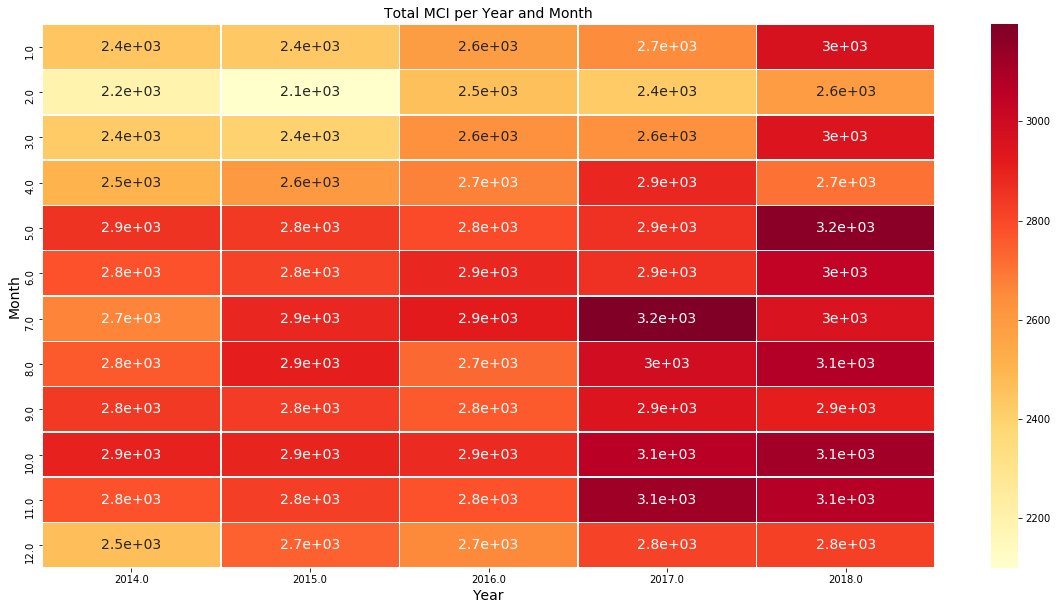

In [1505]:
plt.figure(figsize = (20,10))
plt.title('Total MCI per Year and Month',fontsize=14)
sns.heatmap(df_pivot,annot =True, linewidth = 0.6,cmap ='YlOrRd', annot_kws ={'size':14})
plt.xlabel('Year',fontsize=14)
plt.ylabel('Month',fontsize=14)
plt.show()

### Total MCI  by districts from 2014 to 2018

In [1506]:
# function to compute group size of columns in dataset
neighbourdhood3 = groupby_size(dataset=mci_2014_2018[mci_2014_2018['occurrenceyear'] >= 2014.0],columns =['Hood_ID','Neighbourhood'],name_of_size ='Total of MCI',ascending = False)
neighbourdhood3.reset_index(inplace = True)
neighbourdhood3.rename(columns ={'Hood_ID': 'district_code'},inplace =True)

In [1507]:
# 1. retreives geodata from Neighbourhoods.shp shapefile
data_geom = gpd.read_file('./dataset/Neighbourhoods.shp')
# 2. selects columns need to perform operations
data_geom= data_geom[['FIELD_5','FIELD_11','FIELD_12','geometry']]
data_geom.rename(columns ={'FIELD_11':'x','FIELD_12': 'y','FIELD_5':'district_code'},inplace =True)
# 3. renames columns 'FIELD_11' to 'x','FIELD_12' to 'y','FIELD_5' to 'district_code'
data_geom = pd.merge(data_geom,neighbourdhood3, how ='inner',on ='district_code')


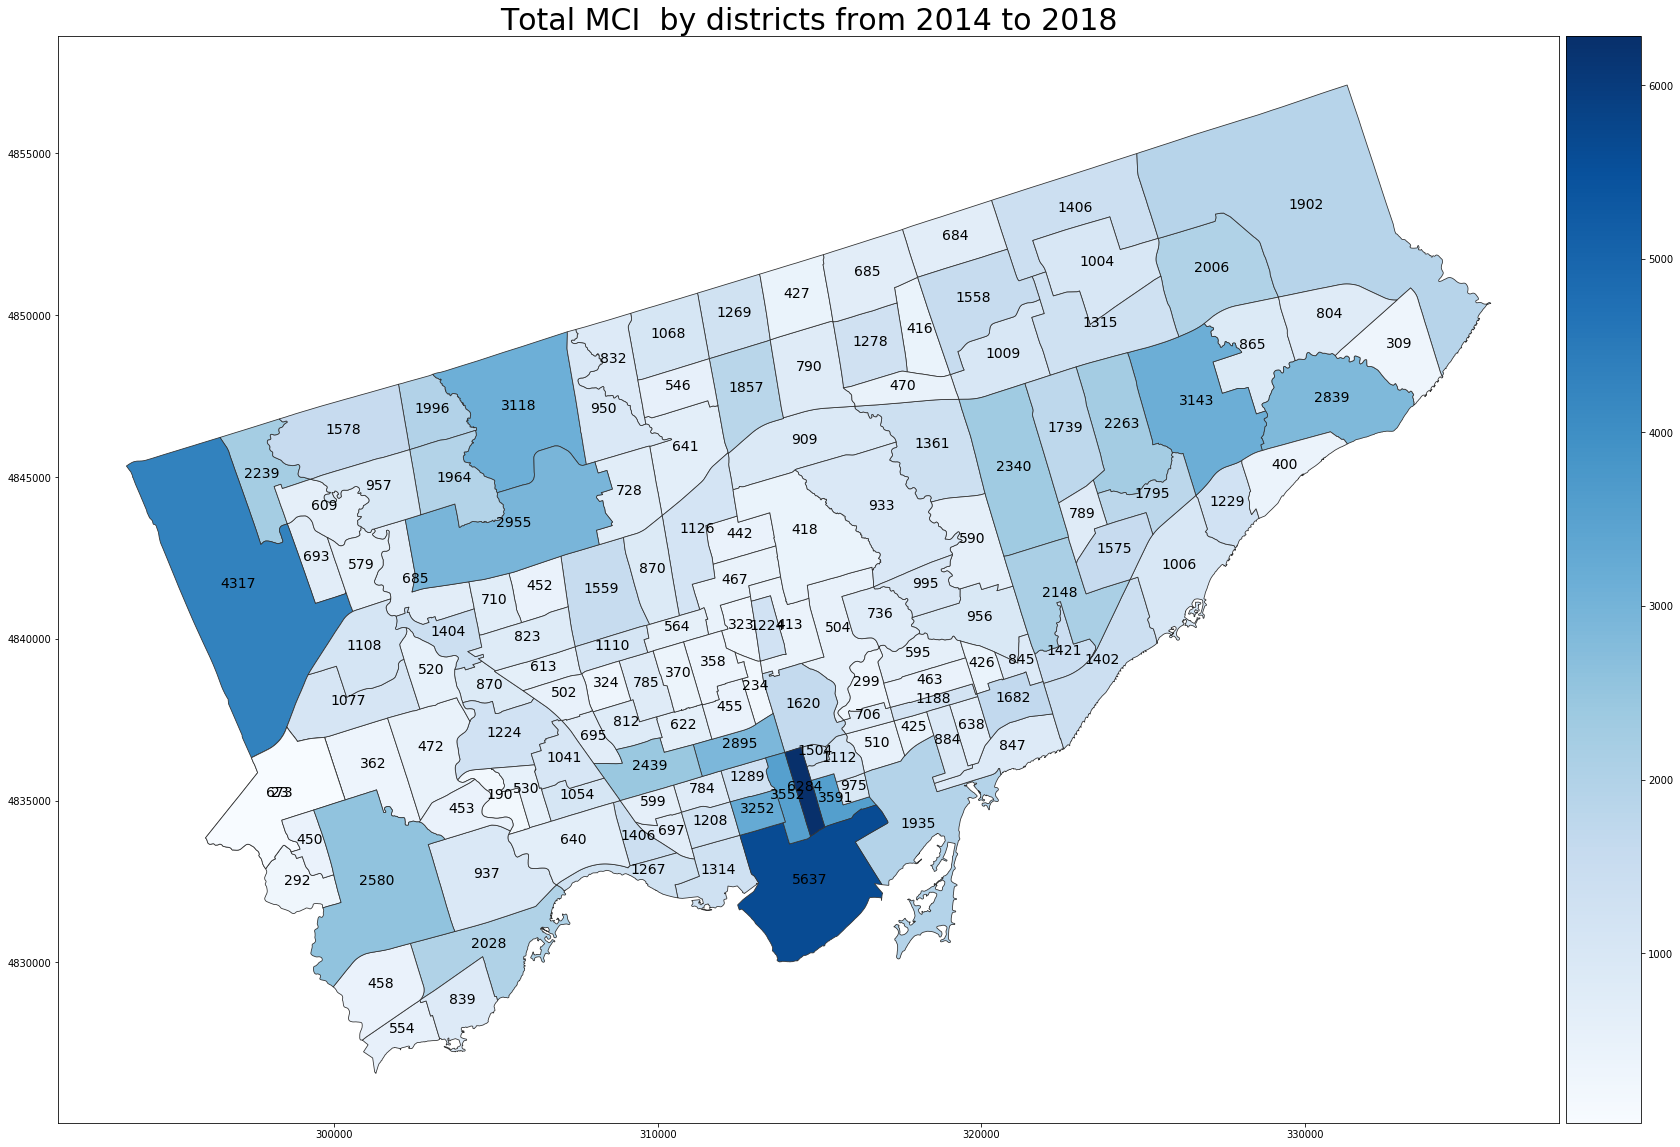

In [1508]:
# import labrairie to make locatable axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
# draws choropleth map
fig, ax = plt.subplots(1, 1,figsize =(30,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
data_geom.rename(columns ={'district_code': 'HOODNUM'},inplace =True)
ax =data_geom.plot(column='Total of MCI', cmap='Blues', linewidth=0.8, edgecolor='0.2',legend=True, ax=ax,cax = cax)
ax.set_title('Total MCI  by districts from 2014 to 2018',fontsize =30)
data_geom.apply(lambda x: ax.annotate(s=x['Total of MCI'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=14),axis=1);


### Average MCI  by district by year

In [1509]:
# function to compute group size of columns in dataset
neighbourdhood4 = groupby_size(dataset=mci_2014_2018[mci_2014_2018['occurrenceyear'] >= 2014.0],columns =['Hood_ID','Neighbourhood','occurrenceyear'],name_of_size ='Total of MCI',ascending = False)
neighbourdhood4 = neighbourdhood4.groupby(['Hood_ID','Neighbourhood'])['Total of MCI'].mean().to_frame().reset_index()
neighbourdhood4.rename(columns ={'Hood_ID': 'district_code','Total of MCI': 'Mean of MCI'},inplace =True)

In [1510]:
# 1. retreives geodata from Neighbourhoods.shp shapefile
data_geom = gpd.read_file('./dataset/Neighbourhoods.shp')
# 2. selects columns need to perform operations
data_geom= data_geom[['FIELD_5','FIELD_11','FIELD_12','geometry']]
data_geom.rename(columns ={'FIELD_11':'x','FIELD_12': 'y','FIELD_5':'district_code'},inplace =True)
# 3. renames columns 'FIELD_11' to 'x','FIELD_12' to 'y','FIELD_5' to 'district_code'
data_geom = pd.merge(data_geom,neighbourdhood4, how ='inner',on ='district_code')

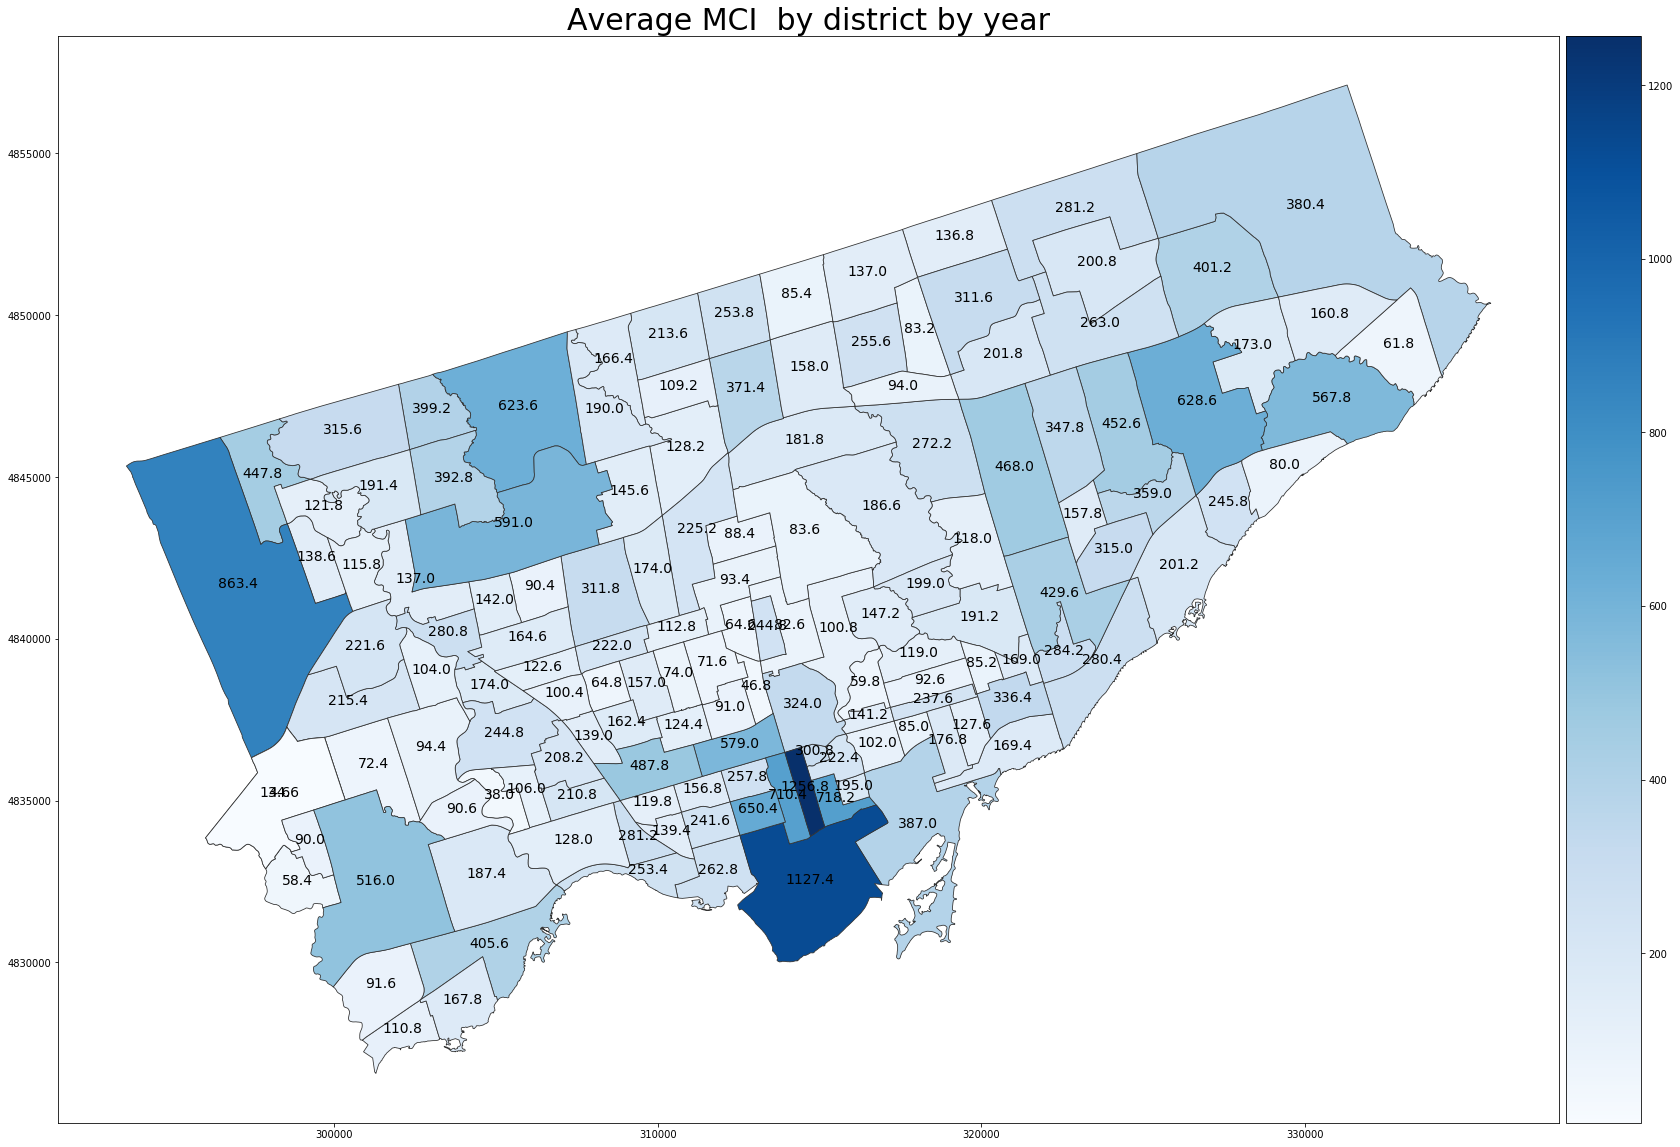

In [1511]:
# import labrairie to make locatable axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
# draws choropleth map
fig, ax = plt.subplots(1, 1,figsize =(30,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
data_geom.rename(columns ={'district_code': 'HOODNUM'},inplace =True)
ax =data_geom.plot(column='Mean of MCI', cmap='Blues', linewidth=0.8, edgecolor='0.2',legend=True, ax=ax,cax = cax)
ax.set_title('Average MCI  by district by year and by Neighborhood',fontsize =30)
data_geom.apply(lambda x: ax.annotate(s=x['Mean of MCI'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=14),axis=1);


In [1512]:
#data_geom.rename(columns ={'HOODNUM':'district_code'},inplace =True)
data_geom1 =data_geom.rename(columns ={'Neighbourhood': 'city_district','HOODNUM':'district_code'})
data_geom1 = data_geom1 [['x','y','geometry','district_code']]

In [1513]:
data = pd.merge(house_by_neighborhood1,neighbourdhood2,how='inner',on =['district_code'])
data.rename(columns = {'city_district_x':'city_district'},inplace = True)
data.drop(columns ='city_district_y',inplace = True)

data1 =  pd.merge(data,neighbourdhood3,how='inner',on =['district_code'])
data1.drop(columns =['index','Neighbourhood'],inplace = True)

data2 =  pd.merge(data1,neighbourdhood4,how='inner',on =['district_code'])
data2.drop(columns =['Neighbourhood'],inplace = True)

neighbourdhood5 = house_data.groupby(['district_code']).mean_district_income.mean().to_frame().reset_index()
data3 =  pd.merge(data2,neighbourdhood5,how='inner',on =['district_code'])

neighbourdhood6 = house_data.groupby(['district_code']).long.mean().to_frame().reset_index()
neighbourdhood7 = house_data.groupby(['district_code']).lat.mean().to_frame().reset_index()
data4 =  pd.merge(data3,neighbourdhood6,how='inner',on =['district_code'])
data5 =  pd.merge(data4,neighbourdhood7,how='inner',on =['district_code'])
data5.head()

district_code                        city_district  Total houses  \
0             77    Waterfront Communities The Island          1145   
1             82                              Niagara           525   
2             17  Mimico (includes Humber Bay Shores)           470   
3             51                      Willowdale East           425   
4             75                Church Yonge Corridor           380   

   Mean house price  Total of MCI  Mean of MCI  mean_district_income  \
0             73.10          5637       1127.4                 70600   
1             68.09          1314        262.8                 70623   
2             66.64          2028        405.6                 54438   
3             69.27          1857        371.4                 45326   
4             71.01          6284       1256.8                 53583   

        long        lat  
0 -79.386787  43.644087  
1 -79.409503  43.639217  
2 -79.483415  43.623844  
3 -79.408362  43.766370  
4 -79.380015  43.662163

In [1514]:
data6 = pd.merge(data5,data_geom1,how ='inner',on ='district_code')


In [1515]:
data6['mean_district_income'] = np.round(np.log(data5['mean_district_income']),2)
data6 = data6[['district_code','Total houses','Mean house price','Total of MCI','Mean of MCI','mean_district_income','city_district','x','y']]
data6

district_code  Total houses  Mean house price  Total of MCI  Mean of MCI  \
0               77          1145             73.10          5637       1127.4   
1               82           525             68.09          1314        262.8   
2               17           470             66.64          2028        405.6   
3               51           425             69.27          1857        371.4   
4               75           380             71.01          6284       1256.8   
5               14           370             63.83          2580        516.0   
6               76           276             83.35          3552        710.4   
7              104           226             70.67          1224        244.8   
8               52           195             62.56           790        158.0   
9               73           181             71.71          3591        718.2   
10             132           175             41.11          2006        401.2   
11             117           160             53.42          1558        311.6   
12              95           158            143.51          2895        579.0   
13              87           139             78.20           640        128.0   
14              42           137             73.68           933        186.6   
15              53           135             52.01           470         94.0   
16             128           134             49.63          1315        263.0   
17             137           121             48.89          3143        628.6   
18              84           121             71.36           697        139.4   
19              93           121             73.90          2439        487.8   
20              37           114             82.73           546        109.2   
21              70           112             88.87          1935        387.0   
22             127           112             49.48          2263        452.6   
23              98            99            197.11          1620        324.0   
24              26            98             59.36          2955        591.0   
25              27            95             54.52          3118        623.6   
26               1            95             45.40          4317        863.4   
27               2            89             41.67          2239        447.8   
28              36            88             71.79          1068        213.6   
29             126            86             47.98          1739        347.8   
30              38            84             89.32           641        128.2   
31              47            81             68.63          1278        255.6   
32              31            80             53.92          1559        311.8   
33              72            75             64.52           975        195.0   
34              35            74             54.67           832        166.4   
35             131            72             71.53          1902        380.4   
36              86            69            105.22          1406        281.2   
37             120            68             62.86          2148        429.6   
38              63            67            116.97           847        169.4   
39             136            67             48.56          2839        567.8   
40               6            67             41.27          1108        221.6   
41              78            65             75.11          3252        650.4   
42              97            64            132.50           234         46.8   
43              44            64             41.87           995        199.0   
44              13            63             50.11           450         90.0   
45              50            63             69.44          1269        253.8   
46             129            62             58.11          1004        200.8   
47              48            61             78.41           685        137.0   
48              39            61    

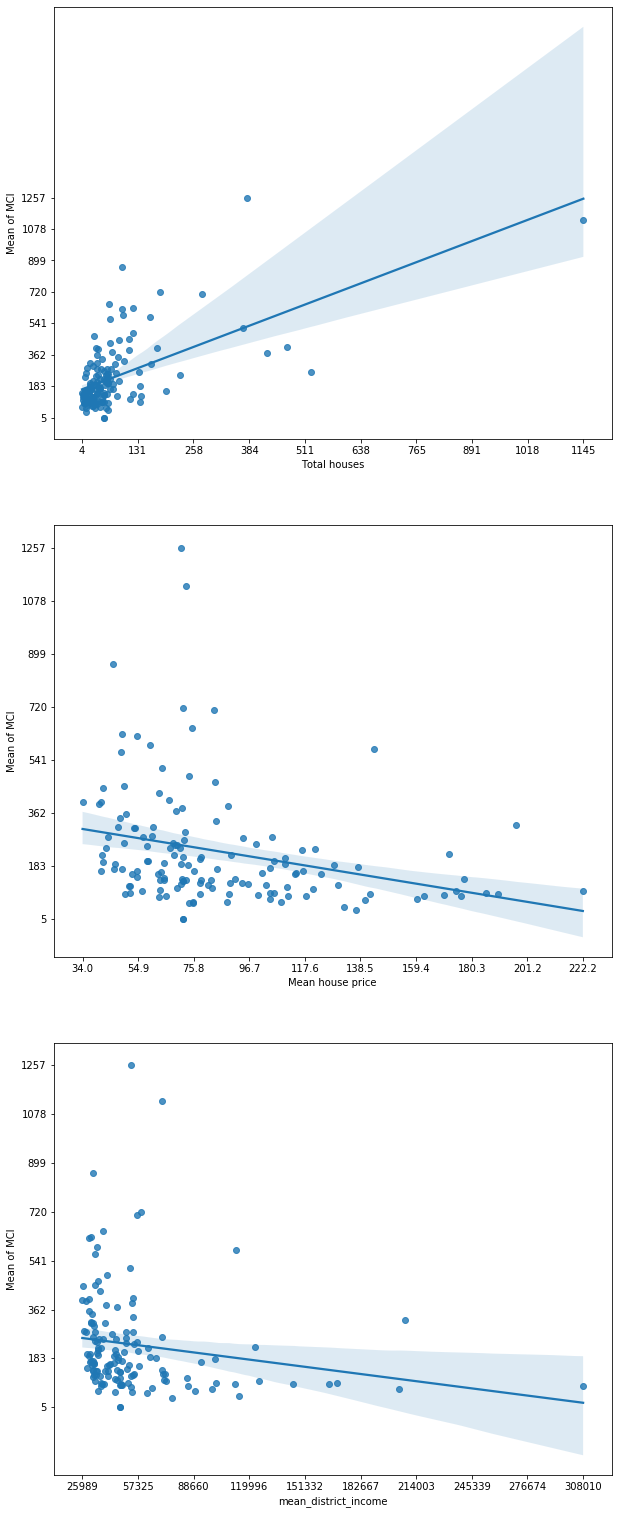

In [1516]:
numerical = ['Total houses','Mean house price','mean_district_income']
fig, ax = plt.subplots(3,1,figsize=(10, 27))
for variable, subplot in zip(numerical, ax.flatten()):
    new_xbins = np.linspace(data5[variable].min(),data5[variable].max(),10)
    new_ybins = np.linspace(data5['Mean of MCI'].min(),data5['Mean of MCI'].max(),8)
    subplot.set_xticks(new_xbins)
    subplot.set_yticks(new_ybins)
    sns.regplot(x =variable,y='Mean of MCI',data =data5,ax=subplot)
    subplot.set(xlabel=variable,ylabel="Mean of MCI")

In [1517]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [1518]:
# @hidden_cell

CLIENT_ID = 'RVJDHM5QFQZ1FLRTQ2G0VHPUZES0YMPJVDBDBHHOTCPGTBN4' # your Foursquare ID
CLIENT_SECRET = '0ONU0KYNRFZG5HXX1FGZWAHD1K5YRYDAKNSAB2L1UWAM0QXQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [1519]:
toronto_latitude = data5.loc[30, 'lat'] # neighborhood latitude value
toronto_longitude = data5.loc[30, 'long'] # neighborhood longitude value

toronto_name = data5.loc[0, 'city_district'] # nteighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(toronto_name, 
                                                               toronto_latitude, 
                                                               toronto_longitude))

Latitude and longitude values of Waterfront Communities The Island are 43.76199495119051, -79.41352190357141.


#### Now, let's get the top 100 venues in radius of 500 meters.

In [1520]:
# @hidden_cell
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 20000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    toronto_latitude,
    toronto_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=RVJDHM5QFQZ1FLRTQ2G0VHPUZES0YMPJVDBDBHHOTCPGTBN4&client_secret=0ONU0KYNRFZG5HXX1FGZWAHD1K5YRYDAKNSAB2L1UWAM0QXQ&v=20180605&ll=43.76199495119051,-79.41352190357141&radius=20000&limit=100'

### Send the GET request and examine the results

In [1521]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e5dda2dc8cff2001b595866'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'totalResults': 240,
  'suggestedBounds': {'ne': {'lat': 43.94199513119069,
    'lng': -79.16475517902784},
   'sw': {'lat': 43.58199477119033, 'lng': -79.66228862811498}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '55665a0b498ec5589987b1f7',
       'name': 'Kinka Izakaya',
       'location': {'address': '4775 Yonge Street, Unit #114',
        'crossStreet': 'Sheppard Ave.',
        'lat': 43.76016102214242,
        'lng': -79.40982686116466,
        'labeledLatLngs': [{'label': 'd

### Let's implement the **get_category_type** function 

In [1522]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [1523]:
data6.head()

district_code  Total houses  Mean house price  Total of MCI  Mean of MCI  \
0             77          1145             73.10          5637       1127.4   
1             82           525             68.09          1314        262.8   
2             17           470             66.64          2028        405.6   
3             51           425             69.27          1857        371.4   
4             75           380             71.01          6284       1256.8   

   mean_district_income                        city_district          x  \
0                 11.16    Waterfront Communities The Island -79.377202   
1                 11.17                              Niagara -79.412420   
2                 10.90  Mimico (includes Humber Bay Shores) -79.500137   
3                 10.72                      Willowdale East -79.401484   
4                 10.89                Church Yonge Corridor -79.379017   

           y  
0  43.633880  
1  43.636681  
2  43.615924  
3  43.770602  
4  43.659649

In [1524]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [1525]:
toronto_venues = getNearbyVenues(names=data6['district_code'],
                                   latitudes=data6['y'],
                                   longitudes=data6['x']
                                  )

77
82
17
51
75
14
76
104
52
73
132
117
95
87
42
53
128
137
84
93
37
70
127
98
26
27
1
2
36
126
38
47
31
72
35
131
86
120
63
136
6
78
97
44
13
50
129
48
39
122
118
85
139
12
16
88
45
11
11
11
11
11
11
11
11
33
96
71
9
62
19
103
130
100
61
108
115
135
40
32
56
25
111
23
55
113
90
124
116
99
138
34
18
24
81
105
46
8
41
133
22
119
15
140
83
74
43
7
10
5
101
94
92
30
64
65
123
54
21
91
20
89
107
59
102
121
80
106
29
110
79
134
114
57
58
66
49
125
60
67
112
69
68
4
3
109
28


In [1632]:
print(toronto_venues.shape)
toronto_venues.head()

(2144, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0            77              43.633880              -79.377202   
1            77              43.633880              -79.377202   
2            77              43.633880              -79.377202   
3            77              43.633880              -79.377202   
4            82              43.636681              -79.412420   

                 Venue  Venue Latitude  Venue Longitude       Venue Category  
0       Island Mariner       43.634130       -79.379781        Boat or Ferry  
1  Thomas Rennie Ferry       43.630326       -79.374799        Boat or Ferry  
2   Algonquin Queen II       43.638018       -79.377857        Boat or Ferry  
3           Water Taxi       43.637916       -79.379649        Boat or Ferry  
4   One Of A Kind Show       43.635516       -79.412808  Arts & Crafts Store

#### Let's check how many venues were returned for each neighborhood

In [1633]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                         
1                                16                      16     16   
2                                 4                       4      4   
3                                15                      15     15   
4                                 2                       2      2   
5                                 5                       5      5   
6                                 5                       5      5   
7                                 1                       1      1   
8                                 3                       3      3   
9                                 3                       3      3   
10                                2                       2      2   
11                               48                      48     48   
12                                4                       4      4   
13                                4                       4      4   
14                               14                      14     14   
15                                1                       1      1   
16                                2                       2      2   
17                                6                       6      6   
18                                7                       7      7   
19                               12                      12     12   
20                                5                       5      5   
21                                1                       1      1   
22                                3                       3      3   
23                                4                       4      4   
24                                5                       5      5   
25                                4                       4      4   
26                                3                       3      3   
27                                9                       9      9   
29                                4                       4      4   
30                                1                       1      1   
31                               21                      21     21   
32                                8                       8      8   
33                                3                       3      3   
34                                4                       4      4   
35                                4                       4      4   
37                                2                       2      2   
38                                1                       1      1   
39                               26                      26     26   
41                                8                       8      8   
42                               20                      20     20   
43                                6                       6      6   
44                               14                      14     14   
45                                2                       2      2   
46                               15                      15     15   
47                               10                      10     10   
48                                2                       2      2   
49                                3                       3      3   
50                                2                       2      2   
51                                1                       1      1   
52                                5                       5      5   
53                                6                       6      6   
54                               14                      14     14   
55                               18                      18     18   
56                               19                      19     19   
57                                3                       3      3   
58                                3                       3      3   
59                      

#### Let's find out how many unique categories can be curated from all the returned venues

In [1634]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 279 uniques categories.


In [1635]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
cols=list(toronto_onehot.columns.values)
cols.pop(cols.index('Neighborhood'))
toronto_onehot=toronto_onehot[['Neighborhood']+cols]

# rename Neighborhood for Neighbourhood so that future merge works
toronto_onehot.rename(columns = {'Neighborhood': 'Neighbourhood'}, inplace = True)
toronto_onehot.head()

Neighbourhood  Accessories Store  African Restaurant  American Restaurant  \
0             77                  0                   0                    0   
1             77                  0                   0                    0   
2             77                  0                   0                    0   
3             77                  0                   0                    0   
4             82                  0                   0                    0   

   Amphitheater  Animal Shelter  Antique Shop  Arcade  Argentinian Restaurant  \
0             0               0             0       0                       0   
1             0               0             0       0                       0   
2             0               0             0       0                       0   
3             0               0             0       0                       0   
4             0               0             0       0                       0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0            0                    0                 0                   0   
1            0                    0                 0                   0   
2            0                    0                 0                   0   
3            0                    0                 0                   0   
4            0                    1                 0                   0   

   Auto Dealership  Auto Garage  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0                0            0          0           0           0       0   
1                0            0          0           0           0       0   
2                0            0          0           0           0       0   
3                0            0          0           0           0       0   
4                0            0          0           0           0       0   

   Bank  Bar  Baseball Field  Basketball Court  Beach  Beer Bar  Beer Store  \
0     0    0               0                 0      0         0           0   
1     0    0               0                 0      0         0           0   
2     0    0               0                 0      0         0           0   
3     0    0               0                 0      0         0           0   
4     0    0               0                 0      0         0           0   

   Belgian Restaurant  Bike Rental / Bike Share  Bike Shop  Bistro  \
0                   0                         0          0       0   
1                   0                         0          0       0   
2                   0                         0          0       0   
3                   0                         0          0       0   
4                   0                         0          0       0   

   Boat or Ferry  Bookstore  Boutique  Bowling Alley  Brazilian Restaurant  \
0              1          0         0              0                     0   
1              1          0         0              0                     0   
2              1          0         0              0                     0   
3              1          0         0              0                     0   
4              0          0         0              0                     0   

   Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Buffet  Building  \
0               0        0            0                0       0         0   
1               0        0            0                0       0         0   
2               0        0            0                0       0         0   
3               0        0            0                0       0         0   
4               0        0            0                0       0         0   

   Burger Joint  Burrito Place  Bus Line  Bus Station  Bus Stop  \
0             0              0         0            0         0   
1             0              0         0            0         0   
2             0              0         0            0         0   
3

In [1636]:
toronto_onehot.shape

(2144, 279)

In [1637]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

Neighbourhood  Accessories Store  African Restaurant  \
0                1           0.000000                 0.0   
1                2           0.000000                 0.0   
2                3           0.000000                 0.0   
3                4           0.000000                 0.0   
4                5           0.000000                 0.2   
5                6           0.000000                 0.0   
6                7           0.000000                 0.0   
7                8           0.000000                 0.0   
8                9           0.000000                 0.0   
9               10           0.000000                 0.0   
10              11           0.000000                 0.0   
11              12           0.000000                 0.0   
12              13           0.000000                 0.0   
13              14           0.000000                 0.0   
14              15           0.000000                 0.0   
15              16           0.000000                 0.0   
16              17           0.000000                 0.0   
17              18           0.000000                 0.0   
18              19           0.000000                 0.0   
19              20           0.000000                 0.0   
20              21           0.000000                 0.0   
21              22           0.000000                 0.0   
22              23           0.000000                 0.0   
23              24           0.000000                 0.0   
24              25           0.000000                 0.0   
25              26           0.000000                 0.0   
26              27           0.000000                 0.0   
27              29           0.000000                 0.0   
28              30           0.000000                 0.0   
29              31           0.000000                 0.0   
30              32           0.000000                 0.0   
31              33           0.000000                 0.0   
32              34           0.000000                 0.0   
33              35           0.000000                 0.0   
34              37           0.000000                 0.0   
35              38           0.000000                 0.0   
36              39           0.000000                 0.0   
37              41           0.000000                 0.0   
38              42           0.000000                 0.0   
39              43           0.000000                 0.0   
40              44           0.000000                 0.0   
41              45           0.000000                 0.0   
42              46           0.000000                 0.0   
43              47           0.000000                 0.0   
44              48           0.000000                 0.0   
45              49           0.000000                 0.0   
46              50           0.000000                 0.0   
47              51           0.000000                 0.0   
48              52           0.000000                 0.0   
49              53           0.000000                 0.0   
50              54           0.000000                 0.0   
51              55           0.000000                 0.0   
52              56           0.000000                 0.0   
53              57           0.000000                 0.0   
54              58           0.000000                 0.0   
55              59           0.000000                 0.0   
56              60           0.000000                 0.0   
57              61           0.000000                 0.0   
58              62           0.000000                 0.0   
59              63           0.000000                 0.0   
60              64           0.000000                 0.0   
61              65           0.000000                 0.0   
62              66           0.000000                 0.0   
63              67           0.000000                 0.0   
64              68           0.000000   

In [1638]:
#### First, let's write a function to sort the venues in descending order.

In [1639]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [1640]:
#### Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [1641]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighbourhood                     1st Most Common Venue  \
0                1                                     Hotel   
1                2                          Business Service   
2                3                         Indian Restaurant   
3                4                               Flower Shop   
4                5                                      Pool   
5                6                               Coffee Shop   
6                7                                       Gym   
7                8                               Gas Station   
8                9                                   Dog Run   
9               10                Construction & Landscaping   
10              11                         Convenience Store   
11              12                            Discount Store   
12              13                               Coffee Shop   
13              14                      Fast Food Restaurant   
14              15                                      Park   
15              16                            Baseball Field   
16              17                                    Bakery   
17              18                         Indian Restaurant   
18              19                               Coffee Shop   
19              20                               Pizza Place   
20              21                       Sporting Goods Shop   
21              22                    Furniture / Home Store   
22              23                                    Bakery   
23              24                               Gas Station   
24              25                             Moving Target   
25              26                                      Park   
26              27                                      Bank   
27              29                         Convenience Store   
28              30                                      Park   
29              31                                Restaurant   
30              32                                      Bank   
31              33                                      Park   
32              34                         Convenience Store   
33              35                      Gym / Fitness Center   
34              37                         Mobile Phone Shop   
35              38                                      Park   
36              39                               Coffee Shop   
37              41                                      Café   
38              42                               Coffee Shop   
39              43                     Portuguese Restaurant   
40              44                       Japanese Restaurant   
41              45                         Food & Drink Shop   
42              46                    Thrift / Vintage Store   
43              47                            Baseball Field   
44              48  Residential Building (Apartment / Condo)   
45              49                                   Dog Run   
46              50                               Bridal Shop   
47              51                                     Hotel   
48              52                               Flower Shop   
49              53                             Shopping Mall   
50              54                               Pizza Place   
51              55                         Indian Restaurant   
52              56                               Coffee Shop   
53              57                                   Theater   
54              58                       Japanese Restaurant   
55              59                               Coffee Shop   
56              60                              Skating Rink   
57              61                               Coffee Shop   
58              62                               Coffee Shop   
59              63                               Coffee Shop   
60              64                            Baseball Field   
61              65                   

In [1642]:
toronto_grouped.rename(columns={'Neighbourhood': 'district_code'},inplace =True)


In [1643]:
toronto_grouped = pd.merge(toronto_grouped,data6, on ='district_code',how ='inner')

In [1655]:
mean = toronto_grouped.loc[toronto_grouped.mean_district_income.notna(),'mean_district_income'].mean()
print(mean)
toronto_grouped.at[112,'mean_district_income'] = mean
toronto_grouped.at[2,'mean_district_income'] = mean
toronto_grouped.at[3,'mean_district_income'] = mean
toronto_grouped[toronto_grouped['mean_district_income'].isna()]


10.786241134751773


Empty DataFrame
Columns: [district_code, Accessories Store, African Restaurant, American Restaurant, Amphitheater, Animal Shelter, Antique Shop, Arcade, Argentinian Restaurant, Art Gallery, Arts & Crafts Store, Asian Restaurant, Athletics & Sports, Auto Dealership, Auto Garage, BBQ Joint, Baby Store, Bagel Shop, Bakery, Bank, Bar, Baseball Field, Basketball Court, Beach, Beer Bar, Beer Store, Belgian Restaurant, Bike Rental / Bike Share, Bike Shop, Bistro, Boat or Ferry, Bookstore, Boutique, Bowling Alley, Brazilian Restaurant, Breakfast Spot, Brewery, Bridal Shop, Bubble Tea Shop, Buffet, Building, Burger Joint, Burrito Place, Bus Line, Bus Station, Bus Stop, Business Service, Butcher, Café, Candy Store, Cantonese Restaurant, Caribbean Restaurant, Castle, Cheese Shop, Chinese Restaurant, Chiropractor, Chocolate Shop, Churrascaria, Clothing Store, Cocktail Bar, Coffee Shop, College Arts Building, College Gym, College Quad, College Rec Center, College Stadium, Comfort Food Restaurant, Comic Shop, Concert Hall, Construction & Landscaping, Convenience Store, Cosmetics Shop, Costume Shop, Cuban Restaurant, Cupcake Shop, Curling Ice, Dance Studio, Deli / Bodega, Department Store, Dessert Shop, Dim Sum Restaurant, Diner, Discount Store, Dive Bar, Doctor's Office, Dog Run, Donut Shop, Dumpling Restaurant, Eastern European Restaurant, Egyptian Restaurant, Electronics Store, Elementary School, Ethiopian Restaurant, Event Space, Falafel Restaurant, Farm, Farmers Market, Fast Food Restaurant, Field, Filipino Restaurant, ...]
Index: []

# 4. Predictive Modeling

In [1645]:
house_final_data1.corr()['final_price_10k']

lat                        -0.117030
long                       -0.031413
district_code               0.011793
sqft_cat                    0.671930
bedrooms_num                0.543526
bathrooms_num               0.676088
parking_num                 0.066738
final_price_10k             1.000000
final_price_log             0.918853
mean_district_income_10k    0.470258
1                          -0.056104
2                          -0.060857
3                           0.002465
4                           0.003048
5                          -0.023720
6                          -0.053362
7                           0.002475
8                          -0.014058
9                           0.037390
10                          0.082504
11                         -0.005944
12                         -0.003043
13                         -0.038639
14                         -0.045002
15                          0.116429
16                          0.074023
17                         -0.039372
1

In [1646]:
house_final_data1 = house_final_data1.drop(columns= ['final_price_log','long','lat','district_code','type','sqft','parking','city_district','sqft_cat'])

In [1647]:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor,ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error,explained_variance_score,mean_absolute_error
from sklearn.pipeline import Pipeline
from  sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [1648]:
def predictive_model (dataset =house_data ,include_bias=False,poly_degree=3, alpha =1.0,random_state =49,learning_rate =0.05,test_size =0.15,target_variable ='final_price_10k',corr_rate_value = 0.15):
    model_dictionary = dict()
    data_filtered = dataset.corr()
    data_filtered.loc[np.abs(data_filtered[target_variable])>corr_rate_value,target_variable]
    features = data_filtered.loc[(np.abs(data_filtered[target_variable])>corr_rate_value) & (np.abs(data_filtered[target_variable]) <1.0),target_variable].index.values
    print(features)
    X = dataset[features]
    y = dataset['final_price_10k']
    X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.15, random_state=random_state)
    lr = LinearRegression()
    inputs=[('polynomial', PolynomialFeatures(include_bias=include_bias)),('model',LinearRegression())]
    pipe1 = Pipeline(inputs)
    rm=Ridge(alpha=alpha)
    inputs=[('polynomial', PolynomialFeatures(include_bias=include_bias,degree =poly_degree)),('model',Ridge(alpha=alpha))]
    pipe2 = Pipeline(inputs)
    abr = AdaBoostRegressor(random_state =random_state,learning_rate =learning_rate)
    rfr = RandomForestRegressor(random_state =random_state)
    gbr = GradientBoostingRegressor(random_state =random_state,learning_rate =learning_rate)
    xtr = ExtraTreesRegressor(random_state =random_state)
    xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.01,max_depth = 5, alpha = 10, n_estimators = 10)
    br = BaggingRegressor(random_state =random_state)
    model_dictionary['model_name'] = ['LinearRegression','Ridge','Polynomial with Linear','Polynomial Ridge','RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','ExtraTreesRegressor','xgboost','BaggingRegressor']
    model_dictionary['model'] = [lr,rm,pipe1,pipe2,rfr,abr,gbr,xtr,xg_reg,br]
    model_dictionary['r_score'] = []
    model_dictionary['mse'] = []
    model_dictionary['rmse']  = []
    model_dictionary['mae'] = []
    model_dictionary['mape'] = []
    model_dictionary['y_pred'] = []
    model_dictionary['y_test'] = []
    
    for model in model_dictionary['model']:
        model.fit(X_train,y_train)
        y_pred =model.predict(X_test)
        model_dictionary['y_pred'].append(y_pred)
        model_dictionary['y_test'].append(y_test)
        model_dictionary['r_score'].append(model.score(X_test,y_test))
        model_dictionary['mse'].append(mean_squared_error(list(y_pred),list(y_test)))
        model_dictionary['rmse'].append(np.sqrt(mean_squared_error(list(y_pred),list(y_test))))
        model_dictionary['mae'].append(mean_absolute_error(list(y_pred),list(y_test)))
        t = np.round((np.abs(list(y_pred) - y_test)/list(y_test))*100,2)
        value = np.round(np.mean(t),2)
        model_dictionary['mape'].append(value)
    model_df =pd.DataFrame(model_dictionary)
    model_df.set_index('model_name',inplace = True)
    return model_df[model_df.r_score > 0]

In [1649]:
model = predictive_model(house_final_data1,random_state =49)
model [['r_score','mse','rmse','mae','mape']]

['bedrooms_num' 'bathrooms_num' 'mean_district_income_10k' 56 95 98
 'Condo Apt' 'Detached' '2000–2500 sq. ft.' '2500–3000 sq. ft.'
 '3000–3500 sq. ft.' '3500–5000 sq. ft.' '500–599 sq. ft.'
 '600–699 sq. ft.' '1 parking' '2 parking' '3 parking' '4 parking']
[23:46:23] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


r_score         mse       rmse        mae   mape
model_name                                                                  
LinearRegression           0.732467  798.406318  28.256085  16.460353  21.38
Ridge                      0.732613  797.969724  28.248358  16.456693  21.38
Polynomial with Linear     0.763291  706.416656  26.578500  14.756956  18.66
Polynomial Ridge           0.763197  706.697456  26.583782  14.303027  17.77
RandomForestRegressor      0.823608  526.410754  22.943643  11.698090  13.48
AdaBoostRegressor          0.717021  844.501529  29.060308  17.837671  24.25
GradientBoostingRegressor  0.813290  557.204159  23.605172  13.399801  17.21
ExtraTreesRegressor        0.800447  595.531739  24.403519  12.250811  14.06
BaggingRegressor           0.818815  540.715670  23.253294  11.882141  13.64

In [1650]:
y_pred =model.loc['BaggingRegressor','y_pred']
y_test = model.loc['BaggingRegressor','y_test']
data =pd.DataFrame({'pred':y_pred,'test': y_test})
data['ape'] = np.round((np.abs(data.pred-data.test)/data.test)*100,2)
data

pred      test     ape
3990    47.797125   50.2000    4.79
2656    58.661332   59.3500    1.16
8224    63.988810   64.9900    1.54
8609    67.280833   71.1000    5.37
14355   77.907260   93.0000   16.23
12921   57.976805   55.0000    5.41
3680    49.788160   50.8000    1.99
10552  134.400000   88.2312   52.33
6083    64.360000   45.6000   41.14
6772    57.337744   67.5000   15.06
10781   63.165435   63.0000    0.26
13416   90.869549   78.8000   15.32
14612   61.431894   58.0000    5.92
5834    70.673374   67.5000    4.70
4494    63.165435   59.2768    6.56
1283    99.018710  133.0000   25.55
14956   77.907260   76.5000    1.84
7917    52.694427   54.5000    3.31
9500    52.907976   52.5000    0.78
14820   57.916179   71.5000   19.00
8396    43.651380   43.5000    0.35
12850   41.438417   42.8000    3.18
15171   47.161331   46.0000    2.52
14935   49.785000   58.5000   14.90
10245   64.487328   62.2500    3.59
2735    47.666235   48.5000    1.72
12553   78.126601   71.8000    8.81
9111    49.249932   58.4000   15.67
12496   70.673374   61.6500   14.64
7936    66.284923   61.5000    7.78
2015    33.958787   39.9000   14.89
14726  100.293333   63.5000   57.94
12543   73.294288   63.3000   15.79
1822    38.592789   38.0000    1.56
14569   84.269630   74.9000   12.51
1815    65.480000   57.5000   13.88
3554    52.357000   47.5000   10.23
5377    48.003964   46.7000    2.79
7311    46.168250   42.5000    8.63
15048   55.393796   48.5000   14.21
14727   45.574645   44.0000    3.58
14439   49.862214   61.0000   18.26
6261    45.529799   48.2000    5.54
626     76.183709   81.5000    6.52
12076  221.350000  257.0000   13.87
14236   38.796967   40.9500    5.26
6087    36.274932   42.0000   13.63
1664    43.916167   49.5000   11.28
7337    57.976805   50.9900   13.70
9213    99.018710  121.5000   18.50
3212    45.433221   44.9000    1.19
5591   131.700433   87.9000   49.83
5284    64.544740   57.9000   11.48
7504    51.271107   59.5000   13.83
13207   66.943732   64.5000    3.79
9265    37.588333   41.3250    9.04
5622   125.799454  104.9000   19.92
2014   280.990000  228.0100   23.24
458     57.971334   53.0000    9.38
13737   57.909766   53.5000    8.24
830     99.538524   64.3000   54.80
8631    65.833298   67.5000    2.47
14001   60.900543   44.9000   35.64
675    152.670000  150.0000    1.78
539     80.196547  103.3000   22.37
4972    54.327632   59.4888    8.68
2845    70.673374   78.9900   10.53
10948   60.142047   52.2558   15.09
12443   54.451272   54.0000    0.84
12558   39.031480   33.1000   17.92
1735    60.784192   61.4000    1.00
3173    36.250000   25.0000   45.00
10240   56.757587   55.3800    2.49
6737   121.540439   84.8000   43.33
7229    55.806624   55.5000    0.55
7466    54.451272   62.1000   12.32
12093   45.574645   49.0000    6.99
3614    45.339603   44.3000    2.35
14362   84.269630   66.0000   27.68
5776   100.086167   63.2000   58.36
6774    49.062794   36.9000   32.96
12720   40.233262   38.5000    4.50
11465   38.796967   39.2000    1.03
7125    46.671323   54.2000   13.89
14429   69.395174   65.2400    6.37
2299    58.502000   78.2000   25.19
9718    54.398128   56.5000    3.72
3510    33.590722   30.4900   10.17
14875   46.910275   42.8000    9.60
4326    62.160000   98.5000   36.89
14365   46.671323   47.5000    1.74
3061    49.273389   46.5000    5.96
6239   185.700000  285.0000   34.84
11341   61.742178   56.0000   10.25
2779    52.869883   54.0000    2.09
4099    82.444880   87.5000    5.78
14817   84.269630   71.5000   17.86
7460    56.834122   59.7000    4.80
10033   65.965000   84.7000   22.12
3294    55.368373   59.8888    7.55
7312   100.678167   95.5000    5.42
12629   69.829161   70.0000    0.24
10206  104.533608  116.0000    9.88
13668   41.215468   41.8000    1.40
8343    79.848967   75.2000    6.18
4112    84.269630   67.5000   24.84
7511    48.003964   50.3000    4.56
14688   66.197675   54.0000   22.59
5451   143.517000  172.5000   16.80
11086  170.830286  195.0000   12.39
6813    54.398128

# 5. Clustering  Modeling

In [1651]:
toronto_grouped.head()

district_code  Accessories Store  African Restaurant  American Restaurant  \
0              1                0.0                 0.0             0.000000   
1              2                0.0                 0.0             0.000000   
2              3                0.0                 0.0             0.066667   
3              4                0.0                 0.0             0.000000   
4              5                0.0                 0.2             0.000000   

   Amphitheater  Animal Shelter  Antique Shop  Arcade  Argentinian Restaurant  \
0           0.0             0.0           0.0     0.0                     0.0   
1           0.0             0.0           0.0     0.0                     0.0   
2           0.0             0.0           0.0     0.0                     0.0   
3           0.0             0.0           0.0     0.0                     0.0   
4           0.0             0.0           0.0     0.0                     0.0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0          0.0                  0.0          0.000000                 0.0   
1          0.0                  0.0          0.000000                 0.0   
2          0.0                  0.0          0.066667                 0.0   
3          0.0                  0.0          0.000000                 0.0   
4          0.0                  0.0          0.000000                 0.0   

   Auto Dealership  Auto Garage  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0              0.0          0.0        0.0         0.0         0.0     0.0   
1              0.0          0.0        0.0         0.0         0.0     0.0   
2              0.0          0.0        0.0         0.0         0.0     0.0   
3              0.0          0.0        0.0         0.0         0.0     0.0   
4              0.0          0.0        0.0         0.0         0.0     0.0   

       Bank  Bar  Baseball Field  Basketball Court  Beach  Beer Bar  \
0  0.062500  0.0             0.0               0.0    0.0       0.0   
1  0.000000  0.0             0.0               0.0    0.0       0.0   
2  0.066667  0.0             0.0               0.0    0.0       0.0   
3  0.000000  0.0             0.0               0.0    0.0       0.0   
4  0.000000  0.0             0.0               0.0    0.0       0.0   

   Beer Store  Belgian Restaurant  Bike Rental / Bike Share  Bike Shop  \
0         0.0                 0.0                       0.0        0.0   
1         0.0                 0.0                       0.0        0.0   
2         0.0                 0.0                       0.0        0.0   
3         0.0                 0.0                       0.0        0.0   
4         0.0                 0.0                       0.0        0.0   

   Bistro  Boat or Ferry  Bookstore  Boutique  Bowling Alley  \
0     0.0            0.0        0.0       0.0            0.0   
1     0.0            0.0        0.0       0.0            0.0   
2     0.0            0.0        0.0       0.0            0.0   
3     0.0            0.0        0.0       0.0            0.0   
4     0.0            0.0        0.0       0.0            0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                   0.0             0.0      0.0          0.0   
1                   0.0             0.0      0.0          0.0   
2                   0.0             0.0      0.0          0.0   
3                   0.0             0.0      0.0          0.0   
4                   0.0             0.0      0.0          0.0   

   Bubble Tea Shop  Buffet  Building  Burger Joint  Burrito Place  Bus Line  \
0              0.0     0.0       0.0           0.0            0.0       0.0   
1              0.0     0.0       0.0           0.0            0.0       0.0   
2              0.0     0.0       0.0           0.0            0.0       0.0   
3              0.0     0.0       0.0           0.0            0.0       0.0   
4              0.0     0.0       0.0           0.0          

In [1656]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop(['city_district','x','y','district_code'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 4, 4, 4, 0, 0, 4, 4, 4], dtype=int32)

In [1657]:
tonronto_cluster = toronto_grouped
tonronto_cluster['Cluster Labels'] = kmeans.labels_

In [1658]:
tonronto_cluster.head()

district_code  Accessories Store  African Restaurant  American Restaurant  \
0              1                0.0                 0.0             0.000000   
1              2                0.0                 0.0             0.000000   
2              3                0.0                 0.0             0.066667   
3              4                0.0                 0.0             0.000000   
4              5                0.0                 0.2             0.000000   

   Amphitheater  Animal Shelter  Antique Shop  Arcade  Argentinian Restaurant  \
0           0.0             0.0           0.0     0.0                     0.0   
1           0.0             0.0           0.0     0.0                     0.0   
2           0.0             0.0           0.0     0.0                     0.0   
3           0.0             0.0           0.0     0.0                     0.0   
4           0.0             0.0           0.0     0.0                     0.0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0          0.0                  0.0          0.000000                 0.0   
1          0.0                  0.0          0.000000                 0.0   
2          0.0                  0.0          0.066667                 0.0   
3          0.0                  0.0          0.000000                 0.0   
4          0.0                  0.0          0.000000                 0.0   

   Auto Dealership  Auto Garage  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0              0.0          0.0        0.0         0.0         0.0     0.0   
1              0.0          0.0        0.0         0.0         0.0     0.0   
2              0.0          0.0        0.0         0.0         0.0     0.0   
3              0.0          0.0        0.0         0.0         0.0     0.0   
4              0.0          0.0        0.0         0.0         0.0     0.0   

       Bank  Bar  Baseball Field  Basketball Court  Beach  Beer Bar  \
0  0.062500  0.0             0.0               0.0    0.0       0.0   
1  0.000000  0.0             0.0               0.0    0.0       0.0   
2  0.066667  0.0             0.0               0.0    0.0       0.0   
3  0.000000  0.0             0.0               0.0    0.0       0.0   
4  0.000000  0.0             0.0               0.0    0.0       0.0   

   Beer Store  Belgian Restaurant  Bike Rental / Bike Share  Bike Shop  \
0         0.0                 0.0                       0.0        0.0   
1         0.0                 0.0                       0.0        0.0   
2         0.0                 0.0                       0.0        0.0   
3         0.0                 0.0                       0.0        0.0   
4         0.0                 0.0                       0.0        0.0   

   Bistro  Boat or Ferry  Bookstore  Boutique  Bowling Alley  \
0     0.0            0.0        0.0       0.0            0.0   
1     0.0            0.0        0.0       0.0            0.0   
2     0.0            0.0        0.0       0.0            0.0   
3     0.0            0.0        0.0       0.0            0.0   
4     0.0            0.0        0.0       0.0            0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                   0.0             0.0      0.0          0.0   
1                   0.0             0.0      0.0          0.0   
2                   0.0             0.0      0.0          0.0   
3                   0.0             0.0      0.0          0.0   
4                   0.0             0.0      0.0          0.0   

   Bubble Tea Shop  Buffet  Building  Burger Joint  Burrito Place  Bus Line  \
0              0.0     0.0       0.0           0.0            0.0       0.0   
1              0.0     0.0       0.0           0.0            0.0       0.0   
2              0.0     0.0       0.0           0.0            0.0       0.0   
3              0.0     0.0       0.0           0.0            0.0       0.0   
4              0.0     0.0       0.0           0.0          

In [1659]:
tonronto_cluster2 =tonronto_cluster[['district_code','Total houses','Mean house price','Total of MCI','Mean of MCI','mean_district_income','city_district','x','y','Cluster Labels']]

In [1663]:
tonronto_cluster2.head()

district_code  Total houses  Mean house price  Total of MCI  Mean of MCI  \
0              1            95             45.40          4317        863.4   
1              2            89             41.67          2239        447.8   
2              3             7             81.19           609        121.8   
3              4             7             82.37           693        138.6   
4              5            27             51.69           579        115.8   

   mean_district_income                      city_district          x  \
0             10.370000             West Humber Clairville -79.596356   
1             10.190000  Mount Olive Silverstone Jamestown -79.587259   
2             10.786241       Thistletown Beaumond Heights -79.563491   
3             10.786241                    Rexdale Kipling -79.566228   
4             10.390000                   Elms Old Rexdale -79.548983   

           y  Cluster Labels  
0  43.716180               1  
1  43.746868               3  
2  43.737988               4  
3  43.723725               4  
4  43.721519               4

In [1669]:
neighborhoods_venues_sorted1=neighborhoods_venues_sorted.rename(columns={'Neighbourhood': 'district_code'})

In [1670]:
neighborhoods_venues_sorted1.head()

district_code 1st Most Common Venue 2nd Most Common Venue  \
0              1                 Hotel      Department Store   
1              2      Business Service   Japanese Restaurant   
2              3     Indian Restaurant  Caribbean Restaurant   
3              4           Flower Shop         Movie Theater   
4              5                  Pool      Business Service   

  3rd Most Common Venue          4th Most Common Venue 5th Most Common Venue  \
0           Pizza Place  Paper / Office Supplies Store      Swiss Restaurant   
1                  Park                    Coffee Shop           Zoo Exhibit   
2           Pizza Place                 Ice Cream Shop           Supermarket   
3                  Farm            Egyptian Restaurant     Electronics Store   
4    African Restaurant     Construction & Landscaping     Mobile Phone Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0         Shopping Mall     Electronics Store        Sandwich Place   
1     Electronics Store     Elementary School  Ethiopian Restaurant   
2       Thai Restaurant                  Bank           Coffee Shop   
3     Elementary School  Ethiopian Restaurant           Event Space   
4   Egyptian Restaurant     Electronics Store     Elementary School   

  9th Most Common Venue 10th Most Common Venue  
0    Chinese Restaurant                   Bank  
1           Event Space     Falafel Restaurant  
2      Asian Restaurant                    Spa  
3    Falafel Restaurant         Farmers Market  
4  Ethiopian Restaurant            Event Space

In [1673]:
district_data_final = pd.merge(neighborhoods_venues_sorted1,tonronto_cluster2,how ='inner', on ='district_code')

In [1675]:
# create map
map_clusters = folium.Map(location=[district_data_final.y.mean(), district_data_final.x.mean()], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, venue1,venues2,venue3 in zip(district_data_final['y'], district_data_final['x'], district_data_final['city_district'], district_data_final['Cluster Labels'], district_data_final['1st Most Common Venue'], district_data_final['2nd Most Common Venue'], district_data_final['3rd Most Common Venue']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster)+ ' ' +venue1+ ' '+ venues2+ ' '+venue3 , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [1676]:
# 1. retreives geodata from Neighbourhoods.shp shapefile
data_geom = gpd.read_file('./dataset/Neighbourhoods.shp')
print(data_geom.shape)
# 2. selects columns need to perform operations
data_geom= data_geom[['FIELD_5','FIELD_11','FIELD_12','geometry']]
data_geom.rename(columns ={'FIELD_11':'x','FIELD_12': 'y','FIELD_5':'district_code'},inplace =True)
# 3. renames columns 'FIELD_11' to 'x','FIELD_12' to 'y','FIELD_5' to 'district_code'
data_geom = pd.merge(data_geom,tonronto_cluster2, how ='inner',on ='district_code')

(140, 16)


In [1680]:
data_geom1 = data_geom[['district_code','geometry','Cluster Labels']]

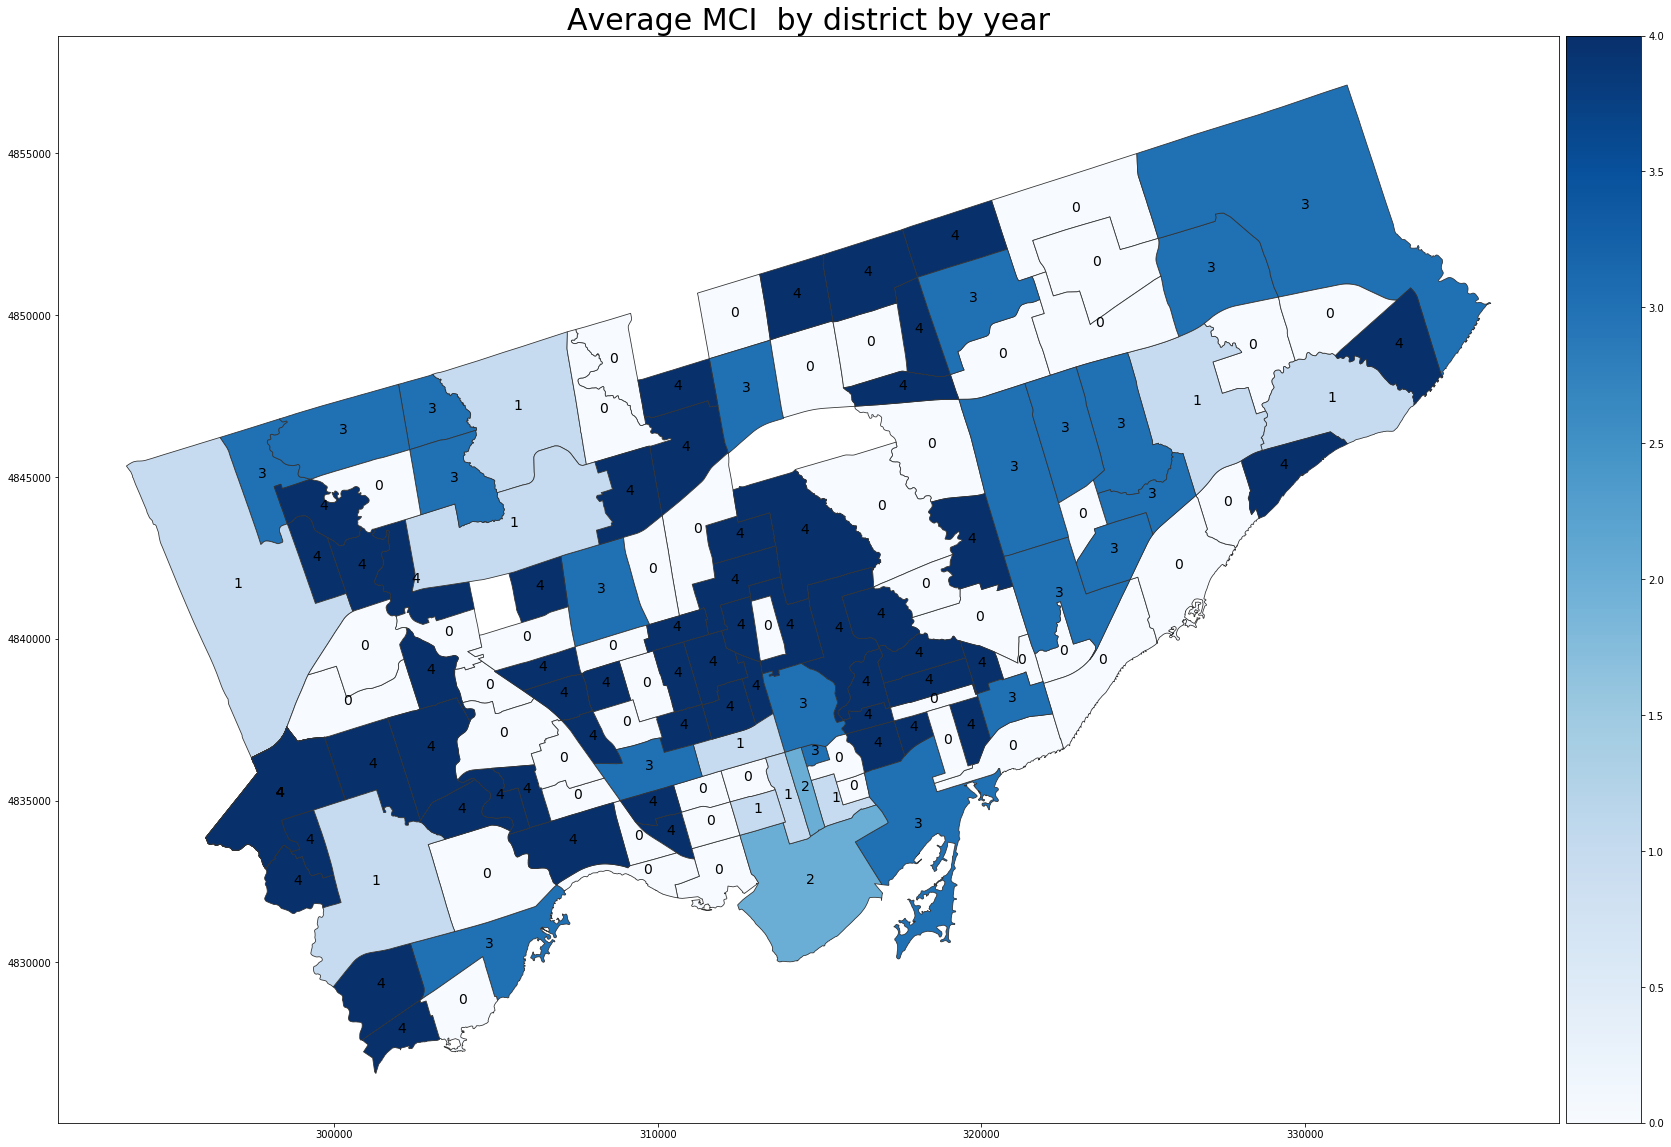

In [1681]:
# import labrairie to make locatable axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
# draws choropleth map
fig, ax = plt.subplots(1, 1,figsize =(30,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax =data_geom1.plot(column='Cluster Labels', cmap='Blues', linewidth=0.8, edgecolor='0.2',legend=True, ax=ax,cax = cax)
ax.set_title('Average MCI  by district by year',fontsize =30)
data_geom1.apply(lambda x: ax.annotate(s=x['Cluster Labels'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=14),axis=1);
